## Import Libraries

In [7]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from numpy import array
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

## Download Files

In [8]:
# Mathieu
path = r'C:\Users\mperan\OneDrive - IESEG\Desktop\DP Analysis\Group Project\DSC_Project_Group2\Project data\\'

# Quinn
# path = 'C:\\Users\\Source\\Documents\\Descriptive and Predictive Analytics\\Group Project\\Project data\\'

In [9]:
# Load from a pickle file using pandas
donors = pd.read_pickle('donors_cleaned.pkl')
gifts = pd.read_pickle('gifts_cleaned.pkl')# Load from a pickle file using pandas
gifts_train = pd.read_pickle('gifts_trained_cleaned.pkl')# Load from a pickle file using pandas
gifts_test = pd.read_pickle('gifts_test_cleaned.pkl')# Load from a pickle file using pandas
campaigns = pd.read_pickle('campaigns_cleaned.pkl')

selection_campaign_6169 = pd.read_csv(path+'selection campaign 6169.csv')
selection_campaign_7244 = pd.read_csv(path+'selection campaign 7244.csv')
selection_campaign_7362 = pd.read_csv(path+'selection campaign 7362.csv')

In [10]:
selection_campaign_7362.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26522 entries, 0 to 26521
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   donorID  26522 non-null  object
dtypes: object(1)
memory usage: 207.3+ KB


In [11]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

# Assuming 'date' is the name of your date column in the 'gifts' DataFrame
gifts['date'] = pd.to_datetime(gifts['date'])

# Define the time window for each dataset
time_window = relativedelta(years=5)

# Drop dates of campaigns
drop_train = pd.to_datetime('2018-09-04')
drop_test = pd.to_datetime('2019-06-18')
drop_score = pd.to_datetime('2020-02-01')

# Define the gap period: 2 weeks
gap_period = timedelta(days=14)

# Calculate the cutoff dates
cutoff_date_train = drop_train - gap_period
cutoff_date_test = drop_test - gap_period
cutoff_date_score = drop_score - gap_period

# Filter the datasets based on a fixed starting date: 5 years time window
gifts_train_start_period = cutoff_date_train - time_window
gifts_test_start_period = cutoff_date_test - time_window
gifts_score_start_period = cutoff_date_score - time_window

# Filter the datasets based on the conditions
gifts_train = gifts[(gifts['date'] >= gifts_train_start_period) & (gifts['date'] <= cutoff_date_train)]
gifts_test = gifts[(gifts['date'] >= gifts_test_start_period) & (gifts['date'] <= cutoff_date_test)]
gifts_score = gifts[(gifts['date'] >= gifts_score_start_period) & (gifts['date'] <= cutoff_date_score)]


## Merge Tables

In [12]:
gifts_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42567 entries, 12 to 216590
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   donorID     42567 non-null  object        
 1   campaignID  42567 non-null  object        
 2   amount      42567 non-null  float64       
 3   date        42567 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.6+ MB


In [13]:
gifts_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39440 entries, 12 to 216593
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   donorID     39440 non-null  object        
 1   campaignID  39440 non-null  object        
 2   amount      39440 non-null  float64       
 3   date        39440 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.5+ MB


In [14]:
# Merge campaigns with gifts

df_train = pd.merge(gifts_train, campaigns, on='campaignID', how='left', suffixes=('_gifts', '_campaigns'))
df_test = pd.merge(gifts_test, campaigns, on='campaignID', how='left', suffixes=('_gifts', '_campaigns'))
df_score = pd.merge(gifts_score, campaigns, on='campaignID', how='left', suffixes=('_gifts', '_campaigns'))

In [15]:
df_train.head()

,donorID,campaignID,amount,date_gifts,date_campaigns,lettersSent,CostUnit
0,D100002,3941,20.0,2015-10-01,2014-12-25,37833.0,0.50
1,D100003,4801,5.0,2017-07-27,2017-07-13,49023.0,0.21
2,D100003,4830,3.0,2017-11-08,2017-09-08,28955.0,0.19
3,D100003,4990,3.0,2017-09-16,2017-11-09,35284.0,0.07
4,D100003,5326,4.0,2018-06-15,2018-08-06,39445.0,0.30


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42567 entries, 0 to 42566
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   donorID         42567 non-null  object        
 1   campaignID      42567 non-null  object        
 2   amount          42567 non-null  float64       
 3   date_gifts      42567 non-null  datetime64[ns]
 4   date_campaigns  40101 non-null  datetime64[ns]
 5   lettersSent     40101 non-null  float64       
 6   CostUnit        40101 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(2)
memory usage: 2.6+ MB


In [17]:
df_test['date_campaigns'].isna().sum()

2405

In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39440 entries, 0 to 39439
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   donorID         39440 non-null  object        
 1   campaignID      39440 non-null  object        
 2   amount          39440 non-null  float64       
 3   date_gifts      39440 non-null  datetime64[ns]
 4   date_campaigns  37035 non-null  datetime64[ns]
 5   lettersSent     37035 non-null  float64       
 6   CostUnit        37035 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(2)
memory usage: 2.4+ MB


In [19]:
# Dropping unnecessary columns
df_train.drop(['date_campaigns', 'lettersSent', 'CostUnit'], axis=1, inplace=True)

In [20]:
# Dropping unnecessary columns
df_test.drop(['date_campaigns', 'lettersSent', 'CostUnit'], axis=1, inplace=True)

In [21]:
# Dropping unnecessary columns
df_score.drop(['date_campaigns', 'lettersSent', 'CostUnit'], axis=1, inplace=True)

In [22]:
donors

,donorID,zipcode,province,region,gender,language,dateOfBirth,Age
0,D100001,1861,Flemish brabant,Flanders,F,NL,1967-12-24,55
1,D100002,2260,Antwerp,Flanders,M,NL,1952-01-14,71
2,D100003,1780,Flemish brabant,Flanders,M,NL,1986-12-23,36
3,D100004,1020,Other,Brussels,F,FR,1952-03-29,71
4,D100005,1020,Other,Brussels,F,FR,1986-06-25,37
...,...,...,...,...,...,...,...,...
44686,D144687,4900,Other,Wallonia,M,FR,1970-09-12,53
44687,D144688,3600,Limburg,Flanders,M,NL,1972-11-28,51
44688,D144689,3061,Flemish brabant,Flanders,M,NL,1967-04-21,56
44689,D144690,1950,Flemish brabant,Flanders,M,FR,1976-05-07,47


In [23]:
# In order to create reliable age groups, we are checking for outliers in the age column
# Age group allows better reliability and no data leakage (tiny change from one year to another)

In [24]:
donors['Age'].describe()

count    44691.000000
mean        54.274328
std         16.133675
min         25.000000
25%         42.000000
50%         52.000000
75%         65.000000
max        134.000000
Name: Age, dtype: float64

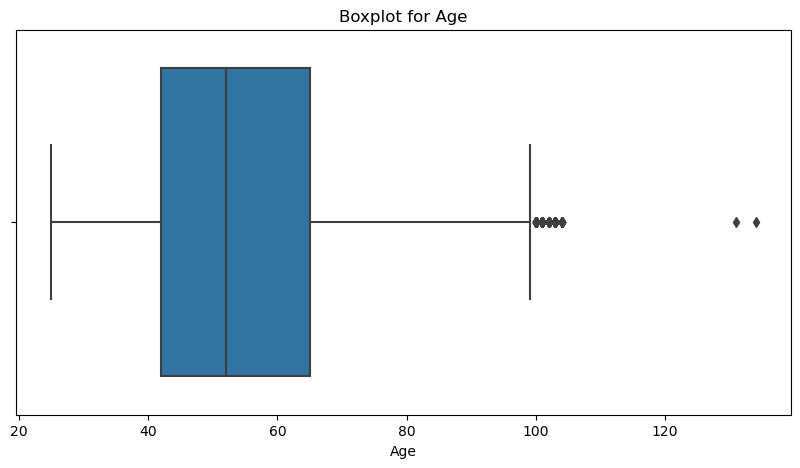

In [25]:
plt.figure(figsize=(10, 5))  # Set the figure size for better visibility
sns.boxplot(x=donors['Age'])  # Create a boxplot for the current column
plt.title(f'Boxplot for Age')  # Set the title for the boxplot
plt.show() 

In [26]:
age_Q1 = donors["Age"].quantile(0.01)  # 1st percentile
age_Q3 = donors["Age"].quantile(0.99)  # 99th percentile
donors["Age"] = donors["Age"].clip(lower=age_Q1, upper=age_Q3)

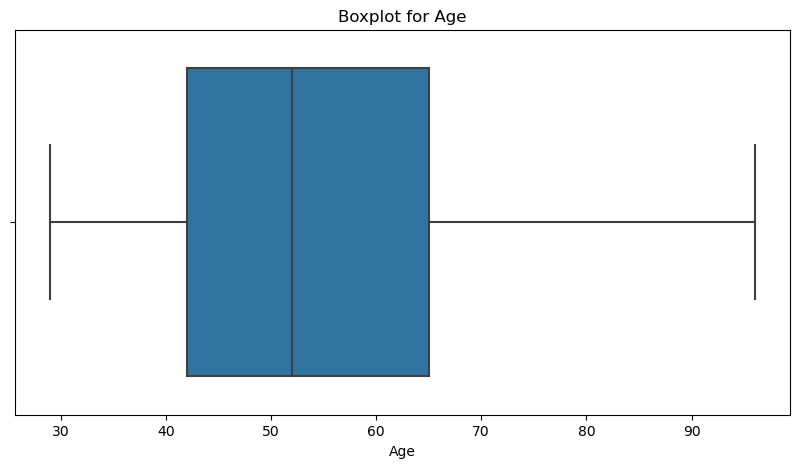

In [27]:
plt.figure(figsize=(10, 5))  # Set the figure size for better visibility
sns.boxplot(x=donors['Age'])  # Create a boxplot for the current column
plt.title(f'Boxplot for Age')  # Set the title for the boxplot
plt.show() 

In [28]:
# For better interpratinility, let's define the bins
custom_bins = [0, 30, 40, 50, 60, 70, 80, 100]

# create labels for age-groups
labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+']

bins = pd.cut(donors['Age'], bins=custom_bins, labels=labels)

donors['age_group'] = bins


In [29]:
donors['age_group'].value_counts(normalize=True) *100

41-50    22.881565
51-60    22.525788
31-40    18.773355
61-70    15.244680
71-80     9.628337
80+       7.325860
0-30      3.620416
Name: age_group, dtype: float64

In [30]:
donors['age_group'] = donors['age_group'].astype('object')

In [31]:
# Dropping Age column
donors.drop(['Age', 'dateOfBirth', 'zipcode'], axis=1, inplace=True)

In [32]:
# Merge donors to get extra information about donors before aggregation

df_train = pd.merge(df_train, donors, on='donorID', how='left')
df_test = pd.merge(df_test, donors, on='donorID', how='left')
df_score = pd.merge(df_score, donors, on='donorID', how='left')

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42567 entries, 0 to 42566
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   donorID     42567 non-null  object        
 1   campaignID  42567 non-null  object        
 2   amount      42567 non-null  float64       
 3   date_gifts  42567 non-null  datetime64[ns]
 4   province    42566 non-null  object        
 5   region      42566 non-null  object        
 6   gender      42566 non-null  object        
 7   language    42566 non-null  object        
 8   age_group   42566 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 3.2+ MB


## Aggregating data in a basetable

### Train set

In [34]:
# Aggregating data by donor ID for train set

# Aggregating demographic features from Donors Data
train_basetable = df_train.groupby('donorID').agg({
    'province': 'first',
    'region': 'first',
    'gender': 'first',
    'language': 'first',
    'age_group': 'first',
    'amount': ['sum', 'mean', 'min', 'max'],
    'date_gifts': ['min','max'],
    'campaignID': 'size',
    'donorID': 'size'
}).reset_index()

train_basetable.columns = ['donorID', 'province', 'region', 'gender', 'language', 'age_group',
                           'total_donation_amount', 'avg_donation_amount', 'min_donation_amount', 
                           'max_donation_amount', 'first_donation_date', 'last_donation_date', 
                           'count_campaigns_participated', 'count_donations']



In [35]:
to_drop = train_basetable[train_basetable['province'].isna()]
to_drop

,donorID,province,region,gender,language,age_group,total_donation_amount,avg_donation_amount,min_donation_amount,max_donation_amount,first_donation_date,last_donation_date,count_campaigns_participated,count_donations
20388,D281770,None,None,None,None,None,30.0,30.0,30.0,30.0,2018-08-09,2018-08-09,1,1


In [36]:
# This donor isn't existing in our donors database, we decide to drop the row, since we have no information for segmentation

train_basetable = train_basetable.drop(index=to_drop.index)

In [37]:
train_basetable

,donorID,province,region,gender,language,age_group,total_donation_amount,avg_donation_amount,min_donation_amount,max_donation_amount,first_donation_date,last_donation_date,count_campaigns_participated,count_donations
0,D100002,Antwerp,Flanders,M,NL,71-80,20.0,20.000000,20.0,20.0,2015-10-01,2015-10-01,1,1
1,D100003,Flemish brabant,Flanders,M,NL,31-40,22.0,3.666667,3.0,5.0,2017-07-27,2018-08-07,6,6
2,D100005,Other,Brussels,F,FR,31-40,10.0,5.000000,5.0,5.0,2016-10-26,2018-06-19,2,2
3,D100006,Other,Brussels,M,FR,80+,5.0,5.000000,5.0,5.0,2017-08-15,2017-08-15,1,1
4,D100007,Other,Brussels,M,FR,61-70,100.0,33.333333,30.0,40.0,2014-05-13,2017-11-30,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20383,D144687,Other,Wallonia,M,FR,51-60,10.0,10.000000,10.0,10.0,2015-06-11,2015-06-11,1,1
20384,D144688,Limburg,Flanders,M,NL,51-60,15.0,15.000000,15.0,15.0,2017-07-27,2017-07-27,1,1
20385,D144689,Flemish brabant,Flanders,M,NL,51-60,100.0,100.000000,100.0,100.0,2018-06-25,2018-06-25,1,1
20386,D144690,Flemish brabant,Flanders,M,FR,41-50,40.0,40.000000,40.0,40.0,2014-12-30,2014-12-30,1,1


In [38]:
train_basetable

,donorID,province,region,gender,language,age_group,total_donation_amount,avg_donation_amount,min_donation_amount,max_donation_amount,first_donation_date,last_donation_date,count_campaigns_participated,count_donations
0,D100002,Antwerp,Flanders,M,NL,71-80,20.0,20.000000,20.0,20.0,2015-10-01,2015-10-01,1,1
1,D100003,Flemish brabant,Flanders,M,NL,31-40,22.0,3.666667,3.0,5.0,2017-07-27,2018-08-07,6,6
2,D100005,Other,Brussels,F,FR,31-40,10.0,5.000000,5.0,5.0,2016-10-26,2018-06-19,2,2
3,D100006,Other,Brussels,M,FR,80+,5.0,5.000000,5.0,5.0,2017-08-15,2017-08-15,1,1
4,D100007,Other,Brussels,M,FR,61-70,100.0,33.333333,30.0,40.0,2014-05-13,2017-11-30,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20383,D144687,Other,Wallonia,M,FR,51-60,10.0,10.000000,10.0,10.0,2015-06-11,2015-06-11,1,1
20384,D144688,Limburg,Flanders,M,NL,51-60,15.0,15.000000,15.0,15.0,2017-07-27,2017-07-27,1,1
20385,D144689,Flemish brabant,Flanders,M,NL,51-60,100.0,100.000000,100.0,100.0,2018-06-25,2018-06-25,1,1
20386,D144690,Flemish brabant,Flanders,M,FR,41-50,40.0,40.000000,40.0,40.0,2014-12-30,2014-12-30,1,1


### Test set

In [39]:
# Applying the exact same steps for the test set

# Aggregating demographic features from Donors Data
test_basetable = df_test.groupby('donorID').agg({
    'province': 'first',
    'region': 'first',
    'gender': 'first',
    'language': 'first',
    'age_group': 'first',
    'amount': ['sum', 'mean', 'min', 'max'],
    'date_gifts': ['min','max'],
    'campaignID': 'size',
    'donorID': 'size'
}).reset_index()

test_basetable.columns = ['donorID', 'province', 'region', 'gender', 'language', 'age_group',
                           'total_donation_amount', 'avg_donation_amount', 'min_donation_amount', 
                           'max_donation_amount', 'first_donation_date', 'last_donation_date', 
                           'count_campaigns_participated', 'count_donations']



In [40]:
test_basetable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19600 entries, 0 to 19599
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   donorID                       19600 non-null  object        
 1   province                      19586 non-null  object        
 2   region                        19586 non-null  object        
 3   gender                        19586 non-null  object        
 4   language                      19586 non-null  object        
 5   age_group                     19586 non-null  object        
 6   total_donation_amount         19600 non-null  float64       
 7   avg_donation_amount           19600 non-null  float64       
 8   min_donation_amount           19600 non-null  float64       
 9   max_donation_amount           19600 non-null  float64       
 10  first_donation_date           19600 non-null  datetime64[ns]
 11  last_donation_date          

In [41]:
# Checking the missing values from test basetable

to_drop = test_basetable[test_basetable['province'].isna()]
to_drop

,donorID,province,region,gender,language,age_group,total_donation_amount,avg_donation_amount,min_donation_amount,max_donation_amount,first_donation_date,last_donation_date,count_campaigns_participated,count_donations
19586,D1474536,None,None,None,None,None,183.0,183.0,183.0,183.0,2018-10-09,2018-10-09,1,1
19587,D202036,None,None,None,None,None,21.0,21.0,21.0,21.0,2018-09-17,2018-09-17,1,1
19588,D205354,None,None,None,None,None,21.0,21.0,21.0,21.0,2018-12-09,2018-12-09,1,1
19589,D210268,None,None,None,None,None,300.0,300.0,300.0,300.0,2018-09-17,2018-09-17,1,1
19590,D212406,None,None,None,None,None,21.0,21.0,21.0,21.0,2018-10-09,2018-10-09,1,1
19591,D225460,None,None,None,None,None,24.0,24.0,24.0,24.0,2018-09-21,2018-09-21,1,1
19592,D231512,None,None,None,None,None,24.0,24.0,24.0,24.0,2018-09-21,2018-09-21,1,1
19593,D253280,None,None,None,None,None,24.0,24.0,24.0,24.0,2018-09-20,2018-09-20,1,1
19594,D255488,None,None,None,None,None,18.0,18.0,18.0,18.0,2018-09-21,2018-09-21,1,1
19595,D263382,None,None,None,None,None,60.0,60.0,60.0,60.0,2018-09-20,2018-09-20,1,1


In [42]:
# These donors not existing in our donors database, we decide to drop the rows as well

test_basetable = test_basetable.drop(index=to_drop.index)

## Score set

In [43]:
# Aggregating data by donor ID for score set

# Aggregating demographic features from Donors Data
score_basetable = df_score.groupby('donorID').agg({
    'province': 'first',
    'region': 'first',
    'gender': 'first',
    'language': 'first',
    'age_group': 'first',
    'amount': ['sum', 'mean', 'min', 'max'],
    'date_gifts': ['min','max'],
    'campaignID': 'size',
    'donorID': 'size'
}).reset_index()

score_basetable.columns = ['donorID', 'province', 'region', 'gender', 'language', 'age_group',
                           'total_donation_amount', 'avg_donation_amount', 'min_donation_amount', 
                           'max_donation_amount', 'first_donation_date', 'last_donation_date', 
                           'count_campaigns_participated', 'count_donations']



In [44]:
to_drop = score_basetable[score_basetable['province'].isna()]
to_drop

,donorID,province,region,gender,language,age_group,total_donation_amount,avg_donation_amount,min_donation_amount,max_donation_amount,first_donation_date,last_donation_date,count_campaigns_participated,count_donations
18421,D1474536,None,None,None,None,None,183.0,183.0,183.0,183.0,2018-10-09,2018-10-09,1,1
18422,D202036,None,None,None,None,None,21.0,21.0,21.0,21.0,2018-09-17,2018-09-17,1,1
18423,D205354,None,None,None,None,None,21.0,21.0,21.0,21.0,2018-12-09,2018-12-09,1,1
18424,D210268,None,None,None,None,None,300.0,300.0,300.0,300.0,2018-09-17,2018-09-17,1,1
18425,D212406,None,None,None,None,None,21.0,21.0,21.0,21.0,2018-10-09,2018-10-09,1,1
18426,D225460,None,None,None,None,None,24.0,24.0,24.0,24.0,2018-09-21,2018-09-21,1,1
18427,D231512,None,None,None,None,None,24.0,24.0,24.0,24.0,2018-09-21,2018-09-21,1,1
18428,D253280,None,None,None,None,None,24.0,24.0,24.0,24.0,2018-09-20,2018-09-20,1,1
18429,D255488,None,None,None,None,None,18.0,18.0,18.0,18.0,2018-09-21,2018-09-21,1,1
18430,D263382,None,None,None,None,None,60.0,60.0,60.0,60.0,2018-09-20,2018-09-20,1,1


In [45]:
score_basetable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18435 entries, 0 to 18434
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   donorID                       18435 non-null  object        
 1   province                      18421 non-null  object        
 2   region                        18421 non-null  object        
 3   gender                        18421 non-null  object        
 4   language                      18421 non-null  object        
 5   age_group                     18421 non-null  object        
 6   total_donation_amount         18435 non-null  float64       
 7   avg_donation_amount           18435 non-null  float64       
 8   min_donation_amount           18435 non-null  float64       
 9   max_donation_amount           18435 non-null  float64       
 10  first_donation_date           18435 non-null  datetime64[ns]
 11  last_donation_date          

In [46]:
# These donors don't exist in our donors database, we decide to drop the row, since we have no information for segmentation

score_basetable = score_basetable.drop(index=to_drop.index)

In [47]:
score_basetable

,donorID,province,region,gender,language,age_group,total_donation_amount,avg_donation_amount,min_donation_amount,max_donation_amount,first_donation_date,last_donation_date,count_campaigns_participated,count_donations
0,D100002,Antwerp,Flanders,M,NL,71-80,20.0,20.000000,20.0,20.0,2015-10-01,2015-10-01,1,1
1,D100003,Flemish brabant,Flanders,M,NL,31-40,46.0,3.833333,3.0,5.0,2017-07-27,2019-08-03,12,12
2,D100005,Other,Brussels,F,FR,31-40,20.0,6.666667,5.0,10.0,2016-10-26,2019-04-18,3,3
3,D100006,Other,Brussels,M,FR,80+,5.0,5.000000,5.0,5.0,2017-08-15,2017-08-15,1,1
4,D100007,Other,Brussels,M,FR,61-70,70.0,35.000000,30.0,40.0,2015-08-18,2017-11-30,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18416,D144686,Antwerp,Flanders,F,NL,51-60,50.0,50.000000,50.0,50.0,2015-04-28,2015-04-28,1,1
18417,D144687,Other,Wallonia,M,FR,51-60,10.0,10.000000,10.0,10.0,2015-06-11,2015-06-11,1,1
18418,D144688,Limburg,Flanders,M,NL,51-60,15.0,15.000000,15.0,15.0,2017-07-27,2017-07-27,1,1
18419,D144689,Flemish brabant,Flanders,M,NL,51-60,400.0,133.333333,100.0,200.0,2018-06-25,2019-06-12,3,3


## Feature Engineering

In [48]:
# Create new time-related variables 
# Train table
# Length Of Relationship (years)
train_basetable['lor'] = cutoff_date_train - train_basetable['first_donation_date']
train_basetable['lor_years'] = (train_basetable['lor'] / pd.Timedelta(days=365.25)).astype(int)

# Donation recency (days)
train_basetable['recency_donation'] = pd.to_datetime(cutoff_date_train) - pd.to_datetime(train_basetable['last_donation_date'])
train_basetable['recency_donation_days'] = train_basetable['recency_donation'].dt.days

# Drop the other date columns
train_basetable.drop(['lor', 'first_donation_date', 'last_donation_date', 'recency_donation'], axis=1, inplace=True)

In [49]:
# Create new time-related variables 
# Test table
# Length Of Relationship (years)
test_basetable['lor'] = cutoff_date_test - test_basetable['first_donation_date']
test_basetable['lor_years'] = (test_basetable['lor'] / pd.Timedelta(days=365.25)).astype(int)

# Donation recency (days)
test_basetable['recency_donation'] = pd.to_datetime(cutoff_date_test) - pd.to_datetime(test_basetable['last_donation_date'])
test_basetable['recency_donation_days'] = test_basetable['recency_donation'].dt.days

# Drop the other date columns
test_basetable.drop(['lor', 'first_donation_date', 'last_donation_date', 'recency_donation'], axis=1, inplace=True)

In [50]:
# Create new time-related variables 
# Score table
# Length Of Relationship (years)
score_basetable['lor'] = cutoff_date_score - score_basetable['first_donation_date']
score_basetable['lor_years'] = (score_basetable['lor'] / pd.Timedelta(days=365.25)).astype(int)

# Donation recency (days)
score_basetable['recency_donation'] = pd.to_datetime(cutoff_date_score) - pd.to_datetime(score_basetable['last_donation_date'])
score_basetable['recency_donation_days'] = score_basetable['recency_donation'].dt.days

# Drop the other date columns
score_basetable.drop(['lor', 'first_donation_date', 'last_donation_date', 'recency_donation'], axis=1, inplace=True)

In [51]:
# Creating time frames variables: the sum of amount donated over last 6,12,18, and 24 months
# Merging with our train basetable

# Ensure 'date_gifts' is in datetime format for the train dataset
df_train['date_gifts'] = pd.to_datetime(df_train['date_gifts'])

# Define time frames
time_frames = {
    'last_6_months': cutoff_date_train - pd.DateOffset(months=6),
    'last_12_months': cutoff_date_train - pd.DateOffset(months=12),
    'last_18_months': cutoff_date_train - pd.DateOffset(months=18),
    'last_24_months': cutoff_date_train - pd.DateOffset(months=24)
}

# Iterate over the time frames
for time_frame, start_date in time_frames.items():
    # Create a mask for the given time frame in the train dataset
    mask_train = (df_train['date_gifts'] > start_date) & (df_train['date_gifts'] <= cutoff_date_train)
    # Group by 'donorID' and calculate the sum within the mask
    sum_amounts_train = df_train.loc[mask_train].groupby('donorID')['amount'].sum()
    # Merge the sum amounts into the train basetable based on 'donorID'
    train_basetable = train_basetable.merge(sum_amounts_train.reset_index(), how='left', on='donorID', suffixes=('', f'_sum_{time_frame}'))
    # Rename the first column to include the time frame
    train_basetable.rename(columns={'amount': f'amount_sum_{time_frame}'}, inplace=True)
    # Replace NaN values with 0 in the newly added columns
    train_basetable[f'amount_sum_{time_frame}'].fillna(0, inplace=True)


In [52]:
# Creating time frames variables: the sum of amount donated over last 6,12,18, and 24 months
# Merging with our test basetable

# Ensure 'date_gifts' is in datetime format for the test dataset
df_test['date_gifts'] = pd.to_datetime(df_test['date_gifts'])

# Define time frames
time_frames = {
    'last_6_months': cutoff_date_test - pd.DateOffset(months=6),
    'last_12_months': cutoff_date_test - pd.DateOffset(months=12),
    'last_18_months': cutoff_date_test - pd.DateOffset(months=18),
    'last_24_months': cutoff_date_test - pd.DateOffset(months=24)
}

# Iterate over the time frames
for time_frame, start_date in time_frames.items():
    
    # Create a mask for the given time frame in the test dataset
    mask_test = (df_test['date_gifts'] > start_date) & (df_test['date_gifts'] <= cutoff_date_test)
    # Group by 'donorID' and calculate the sum within the mask
    sum_amounts_test = df_test.loc[mask_test].groupby('donorID')['amount'].sum()
    # Merge the sum amounts into the test basetable based on 'donorID'
    test_basetable = test_basetable.merge(sum_amounts_test.reset_index(), how='left', on='donorID', suffixes=('', f'_sum_{time_frame}'))
    # Rename the first column to include the time frame
    test_basetable.rename(columns={'amount': f'amount_sum_{time_frame}'}, inplace=True)
    # Replace NaN values with 0 in the newly added columns
    test_basetable[f'amount_sum_{time_frame}'].fillna(0, inplace=True)


In [53]:
# Creating time frames variables: the sum of amount donated over last 6,12,18, and 24 months
# Merging with our train and test basetables

# Ensure 'date_gifts' is in datetime format for both train and test datasets
df_score['date_gifts'] = pd.to_datetime(df_score['date_gifts'])

# Define time frames
time_frames = {
    'last_6_months': cutoff_date_score - pd.DateOffset(months=6),
    'last_12_months': cutoff_date_score - pd.DateOffset(months=12),
    'last_18_months': cutoff_date_score - pd.DateOffset(months=18),
    'last_24_months': cutoff_date_score - pd.DateOffset(months=24)
}

# Iterate over the time frames
for time_frame, start_date in time_frames.items():
    # Create a mask for the given time frame in the train dataset
    mask_score = (df_score['date_gifts'] > start_date) & (df_score['date_gifts'] <= cutoff_date_score)
    # Group by 'donorID' and calculate the sum within the mask
    sum_amounts_score = df_score.loc[mask_score].groupby('donorID')['amount'].sum()
    # Merge the sum amounts into the score basetable based on 'donorID'
    score_basetable = score_basetable.merge(sum_amounts_score.reset_index(), how='left', on='donorID', suffixes=('', f'_sum_{time_frame}'))
    # Rename the first column to include the time frame
    score_basetable.rename(columns={'amount': f'amount_sum_{time_frame}'}, inplace=True)
    # Replace NaN values with 0 in the newly added columns
    score_basetable[f'amount_sum_{time_frame}'].fillna(0, inplace=True)
    


In [54]:
# Train table
# Calculate the average amount per province
province_average = df_train.groupby('province')['amount'].mean().rename('province_avg')

# Merge the average back into the original DataFrame
train_basetable = train_basetable.merge(province_average, on='province')

In [55]:
# Test table
# Calculate the average amount per province
province_average = df_test.groupby('province')['amount'].mean().rename('province_avg')

# Merge the average back into the original DataFrame, using the training mean
test_basetable = test_basetable.merge(province_average, on='province')

In [56]:
# Calculate the average amount per province
province_average = df_score.groupby('province')['amount'].mean().rename('province_avg')

# Merge the average back into the original DataFrame
score_basetable = score_basetable.merge(province_average, on='province')

In [57]:
# Train table
# Calculate the average amount per age group
age_group_average = df_train.groupby('age_group')['amount'].mean().rename('age_group_avg')

# Merge the average back into the original DataFrame
train_basetable = train_basetable.merge(age_group_average, on='age_group')

In [58]:
# Test table
# Calculate the average amount per age group
age_group_average = df_test.groupby('age_group')['amount'].mean().rename('age_group_avg')

# Merge the average back into the original DataFrame
test_basetable = test_basetable.merge(age_group_average, on='age_group')

In [59]:
# Calculate the average amount per age group
age_group_average = df_score.groupby('age_group')['amount'].mean().rename('age_group_avg')

# Merge the average back into the original DataFrame
score_basetable = score_basetable.merge(age_group_average, on='age_group')

In [60]:
# Train table
# Calculate the average amount of 'good donors' (donation>30)

# First, filter out the transactions where the amount is less than 30
transactions_30_and_over = df_train[df_train['amount'] >= 30]

# Now, group by 'donorID' and calculate the mean of 'amount'
average_amount_30_and_over = transactions_30_and_over.groupby('donorID')['amount'].mean().reset_index(name='avg_amount_30_plus')

# Merge this average back into the original DataFrame
train_basetable = train_basetable.merge(average_amount_30_and_over, on='donorID', how='left')

# Replace NaN values with 0 for donors with no transactions of 30 and over
train_basetable['avg_amount_30_plus'].fillna(0, inplace=True)


In [61]:
# Test table
# Calculate the average amount of 'good donors' (donation>30)

# First, filter out the transactions where the amount is less than 30
transactions_30_and_over = df_test[df_test['amount'] >= 30]

# Now, group by 'donorID' and calculate the mean of 'amount'
average_amount_30_and_over = transactions_30_and_over.groupby('donorID')['amount'].mean().reset_index(name='avg_amount_30_plus')

# Merge this average back into the original DataFrame
test_basetable = test_basetable.merge(average_amount_30_and_over, on='donorID', how='left')

# Replace NaN values with 0 for donors with no transactions of 30 and over
test_basetable['avg_amount_30_plus'].fillna(0, inplace=True)


In [62]:
# Calculate the average amount of 'good donors' (donation>30)

# First, filter out the transactions where the amount is less than 30
transactions_30_and_over = df_score[df_score['amount'] >= 30]

# Now, group by 'donorID' and calculate the mean of 'amount'
average_amount_30_and_over = transactions_30_and_over.groupby('donorID')['amount'].mean().reset_index(name='avg_amount_30_plus')

# Merge this average back into the original DataFrame
score_basetable = score_basetable.merge(average_amount_30_and_over, on='donorID', how='left')

# Replace NaN values with 0 for donors with no transactions of 30 and over
score_basetable['avg_amount_30_plus'].fillna(0, inplace=True)


In [63]:
train_basetable.head()

,donorID,province,region,gender,language,age_group,total_donation_amount,avg_donation_amount,min_donation_amount,max_donation_amount,count_campaigns_participated,count_donations,lor_years,recency_donation_days,amount_sum_last_6_months,amount_sum_last_12_months,amount_sum_last_18_months,amount_sum_last_24_months,province_avg,age_group_avg,avg_amount_30_plus
0,D100002,Antwerp,Flanders,M,NL,71-80,20.0,20.000000,20.0,20.0,1,1,2,1055,0.0,0.0,0.0,0.0,29.651334,28.57854,0.000000
1,D100570,Antwerp,Flanders,M,NL,71-80,60.0,30.000000,30.0,30.0,2,2,4,799,0.0,0.0,0.0,0.0,29.651334,28.57854,30.000000
2,D100611,Antwerp,Flanders,F,NL,71-80,65.0,32.500000,30.0,35.0,2,2,3,1022,0.0,0.0,0.0,0.0,29.651334,28.57854,32.500000
3,D100614,Antwerp,Flanders,M,NL,71-80,5.0,5.000000,5.0,5.0,1,1,3,1241,0.0,0.0,0.0,0.0,29.651334,28.57854,0.000000
4,D100625,Antwerp,Flanders,F,NL,71-80,101.0,33.666667,30.0,41.0,3,3,4,56,41.0,41.0,41.0,41.0,29.651334,28.57854,33.666667


In [64]:
train_basetable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20388 entries, 0 to 20387
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   donorID                       20388 non-null  object 
 1   province                      20388 non-null  object 
 2   region                        20388 non-null  object 
 3   gender                        20388 non-null  object 
 4   language                      20388 non-null  object 
 5   age_group                     20388 non-null  object 
 6   total_donation_amount         20388 non-null  float64
 7   avg_donation_amount           20388 non-null  float64
 8   min_donation_amount           20388 non-null  float64
 9   max_donation_amount           20388 non-null  float64
 10  count_campaigns_participated  20388 non-null  int64  
 11  count_donations               20388 non-null  int64  
 12  lor_years                     20388 non-null  int32  
 13  r

In [65]:
test_basetable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19586 entries, 0 to 19585
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   donorID                       19586 non-null  object 
 1   province                      19586 non-null  object 
 2   region                        19586 non-null  object 
 3   gender                        19586 non-null  object 
 4   language                      19586 non-null  object 
 5   age_group                     19586 non-null  object 
 6   total_donation_amount         19586 non-null  float64
 7   avg_donation_amount           19586 non-null  float64
 8   min_donation_amount           19586 non-null  float64
 9   max_donation_amount           19586 non-null  float64
 10  count_campaigns_participated  19586 non-null  int64  
 11  count_donations               19586 non-null  int64  
 12  lor_years                     19586 non-null  int32  
 13  r

In [66]:
score_basetable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18421 entries, 0 to 18420
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   donorID                       18421 non-null  object 
 1   province                      18421 non-null  object 
 2   region                        18421 non-null  object 
 3   gender                        18421 non-null  object 
 4   language                      18421 non-null  object 
 5   age_group                     18421 non-null  object 
 6   total_donation_amount         18421 non-null  float64
 7   avg_donation_amount           18421 non-null  float64
 8   min_donation_amount           18421 non-null  float64
 9   max_donation_amount           18421 non-null  float64
 10  count_campaigns_participated  18421 non-null  int64  
 11  count_donations               18421 non-null  int64  
 12  lor_years                     18421 non-null  int32  
 13  r

## Basetables merging with candidate donors

In [67]:
train1 = selection_campaign_6169.merge(train_basetable, on='donorID', how='left')

In [68]:
test1 = selection_campaign_7244.merge(test_basetable, on='donorID', how='left')

In [69]:
score1 = selection_campaign_7362.merge(score_basetable, on='donorID', how='left')

In [70]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34888 entries, 0 to 34887
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   donorID                       34888 non-null  object 
 1   province                      11550 non-null  object 
 2   region                        11550 non-null  object 
 3   gender                        11550 non-null  object 
 4   language                      11550 non-null  object 
 5   age_group                     11550 non-null  object 
 6   total_donation_amount         11550 non-null  float64
 7   avg_donation_amount           11550 non-null  float64
 8   min_donation_amount           11550 non-null  float64
 9   max_donation_amount           11550 non-null  float64
 10  count_campaigns_participated  11550 non-null  float64
 11  count_donations               11550 non-null  float64
 12  lor_years                     11550 non-null  float64
 13  r

In [71]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25645 entries, 0 to 25644
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   donorID                       25645 non-null  object 
 1   province                      9248 non-null   object 
 2   region                        9248 non-null   object 
 3   gender                        9248 non-null   object 
 4   language                      9248 non-null   object 
 5   age_group                     9248 non-null   object 
 6   total_donation_amount         9248 non-null   float64
 7   avg_donation_amount           9248 non-null   float64
 8   min_donation_amount           9248 non-null   float64
 9   max_donation_amount           9248 non-null   float64
 10  count_campaigns_participated  9248 non-null   float64
 11  count_donations               9248 non-null   float64
 12  lor_years                     9248 non-null   float64
 13  r

In [72]:
score1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26522 entries, 0 to 26521
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   donorID                       26522 non-null  object 
 1   province                      11296 non-null  object 
 2   region                        11296 non-null  object 
 3   gender                        11296 non-null  object 
 4   language                      11296 non-null  object 
 5   age_group                     11296 non-null  object 
 6   total_donation_amount         11296 non-null  float64
 7   avg_donation_amount           11296 non-null  float64
 8   min_donation_amount           11296 non-null  float64
 9   max_donation_amount           11296 non-null  float64
 10  count_campaigns_participated  11296 non-null  float64
 11  count_donations               11296 non-null  float64
 12  lor_years                     11296 non-null  float64
 13  r

###  Error correction

In [73]:
# Create list of IVs
iv_list = train1.drop(['donorID'], axis=1)

In [74]:
# Categorical variables
iv_cat_list = [v for v in iv_list if train1[v].dtypes == object]
print(len(iv_cat_list), iv_cat_list)

5 ['province', 'region', 'gender', 'language', 'age_group']


In [75]:
# Numerical variables
iv_num_list = [v for v in iv_list if v not in iv_cat_list]
print(len(iv_num_list), iv_num_list)

15 ['total_donation_amount', 'avg_donation_amount', 'min_donation_amount', 'max_donation_amount', 'count_campaigns_participated', 'count_donations', 'lor_years', 'recency_donation_days', 'amount_sum_last_6_months', 'amount_sum_last_12_months', 'amount_sum_last_18_months', 'amount_sum_last_24_months', 'province_avg', 'age_group_avg', 'avg_amount_30_plus']


####  Missing value

##### a) Missing value in numerical variables

In [76]:
# #Install Python library

# pip install feature-engine

In [77]:
# Check for missing value
train1[iv_num_list].isna().sum().sum()

350070

In [78]:
# Print out numeric columns with missing value

for v in iv_num_list:
    if train1[v].isna().sum() > 0:
        
        # Calculate the count of missing values
        cnt_missing = train1[v].isna().sum()
        
        # Calculate the percentage of missing values
        percentage_missing = (cnt_missing / len(train1)) * 100
        print(v, '[', train1[v].dtype, ']', cnt_missing, 'count(s), % of missing: {:.2f}'.format(percentage_missing))
        
if train1[iv_num_list].isna().sum().sum() == 0: 
    print("No missing value in numeric variables for train set")

total_donation_amount [ float64 ] 23338 count(s), % of missing: 66.89
avg_donation_amount [ float64 ] 23338 count(s), % of missing: 66.89
min_donation_amount [ float64 ] 23338 count(s), % of missing: 66.89
max_donation_amount [ float64 ] 23338 count(s), % of missing: 66.89
count_campaigns_participated [ float64 ] 23338 count(s), % of missing: 66.89
count_donations [ float64 ] 23338 count(s), % of missing: 66.89
lor_years [ float64 ] 23338 count(s), % of missing: 66.89
recency_donation_days [ float64 ] 23338 count(s), % of missing: 66.89
amount_sum_last_6_months [ float64 ] 23338 count(s), % of missing: 66.89
amount_sum_last_12_months [ float64 ] 23338 count(s), % of missing: 66.89
amount_sum_last_18_months [ float64 ] 23338 count(s), % of missing: 66.89
amount_sum_last_24_months [ float64 ] 23338 count(s), % of missing: 66.89
province_avg [ float64 ] 23338 count(s), % of missing: 66.89
age_group_avg [ float64 ] 23338 count(s), % of missing: 66.89
avg_amount_30_plus [ float64 ] 23338 co

In [79]:
'''
The number of missing value is huge, since we have no information about 67% of the donors from our table. Therefore,
it is decisive to take the right decision on how to handle them. 
We decided not to remove them, since they still receive the letters for the campaign, and are potential donators.

We could replace them by median or mean, but we decided to replace them by 0 instead, since these will be meaningful 0.
In that case, our missing values indicate no activity from the donors, not an error in the database.

'''

'\nThe number of missing value is huge, since we have no information about 67% of the donors from our table. Therefore,\nit is decisive to take the right decision on how to handle them. \nWe decided not to remove them, since they still receive the letters for the campaign, and are potential donators.\n\nWe could replace them by median or mean, but we decided to replace them by 0 instead, since these will be meaningful 0.\nIn that case, our missing values indicate no activity from the donors, not an error in the database.\n\n'

In [80]:
# Replace numerical missing values by 0, and create a missing indicator for each variable imputed

from feature_engine.imputation import AddMissingIndicator
from feature_engine.imputation import ArbitraryNumberImputer

# Initialize the transformer to add missing indicators
indicator = AddMissingIndicator(variables=iv_num_list)

# Fit and transform the transformer on the DataFrame
train1_with_missing_indicator = indicator.fit_transform(train1)

# Initialize the imputer 
ami = ArbitraryNumberImputer(arbitrary_number=0, variables=iv_num_list)

# Fit and transform the imputer on the DataFrame
train1 = ami.fit_transform(train1_with_missing_indicator)

In [81]:
# For the test and score sets, we simply transform, in order to avoid data leakage
# Replace numerical missing values by 0, and create a missing indicator for each variable imputed

# Transform with the missing indicator
test1_with_missing_indicator = indicator.transform(test1)
score1_with_missing_indicator = indicator.transform(score1)

# Transform with the arbitrary number imputer
test1 = ami.transform(test1_with_missing_indicator)
score1 = ami.transform(score1_with_missing_indicator)


In [82]:
# Check if the code worked
# Print out numeric columns with missing value
for v in iv_num_list:
    if train1[v].isna().sum() > 0:
        
        # Calculate the count of missing values
        cnt_missing = train1[v].isna().sum()
        
        # Calculate the percentage of missing values
        percentage_missing = (cnt_missing / len(train1)) * 100
        print(v, '[', train1[v].dtype, ']', cnt_missing, 'count(s), % of missing: {:.2f}'.format(percentage_missing))
        
if train1[iv_num_list].isna().sum().sum() == 0: 
    print("No missing value in numeric variables in train set")

No missing value in numeric variables in train set


##### (b) Missing value in categorical variables

In [83]:
# Check missing value for categorical variables
train1[iv_cat_list].isna().sum().sum()

116690

In [84]:
# Print out date columns with missing value
for v in iv_cat_list:
    if train1[v].isna().sum() > 0:
        
        # Calculate the count of missing values
        cnt_missing = train1[v].isna().sum()
        
        # Calculate the percentage of missing values
        percentage_missing = (cnt_missing / len(train1)) * 100
        print(v, '[', train1[v].dtype, ']', cnt_missing, 'count(s), % of missing: {:.2f}'.format(percentage_missing))
        
if train1[iv_cat_list].isna().sum().sum() == 0: 
    print("No missing value in date variables for train set")

province [ object ] 23338 count(s), % of missing: 66.89
region [ object ] 23338 count(s), % of missing: 66.89
gender [ object ] 23338 count(s), % of missing: 66.89
language [ object ] 23338 count(s), % of missing: 66.89
age_group [ object ] 23338 count(s), % of missing: 66.89


In [85]:
# Replace the categorical missing values of the three sets by the mode from train set

for v in iv_cat_list:
    mode_value = train1[v].mode()[0]
    train1[v].fillna(mode_value, inplace=True)
    test1[v].fillna(mode_value, inplace=True)
    score1[v].fillna(mode_value, inplace=True)

In [86]:
# Check if the code worked
for v in iv_cat_list:
    if train1[v].isna().sum() > 0:
        print(v, '[', train1[v].dtype, ']', train1[v].isna().sum(), 'missing(s)')
        
if train1[iv_cat_list].isna().sum().sum() == 0: 
    print("No missing value in categorical variables for train set")

No missing value in categorical variables for train set


In [87]:
# Replacing values with frequency <1% by the train set mode

for v in iv_cat_list:
    # Calculate frequencies in the training set
    value_counts_train = train1[v].value_counts(normalize=True)
    
    # Identify values with less than 1% frequency
    infrequent_values = value_counts_train[value_counts_train < 0.01].index
    
    # Replace infrequent values with the mode from the training set
    train1[v] = train1[v].replace(infrequent_values, train1[v].mode()[0])
    test1[v] = test1[v].replace(infrequent_values, train1[v].mode()[0])
    score1[v] = score1[v].replace(infrequent_values, score1[v].mode()[0])


## Creating Target Variable

In [88]:
'''
To create the target variable, we look into the original gifts table, based on two conditions:
the campaignID, and the amount (has the donor given >= 30 for this specific campaign)

We are not filtering by any date because we looked at the donations for these specific campaigns during the first data cleaning
and saw that some donations are made before the launch of the campaign, which might be due to a human mistake in our opinion.
On the other hand, no donation has been made long time after the campaign started (not more than 1 month), so we do not need 
to set an ending date filter neither.

'''

'\nTo create the target variable, we look into the original gifts table, based on two conditions:\nthe campaignID, and the amount (has the donor given >= 30 for this specific campaign)\n\nWe are not filtering by any date because we looked at the donations for these specific campaigns during the first data cleaning\nand saw that some donations are made before the launch of the campaign, which might be due to a human mistake in our opinion.\nOn the other hand, no donation has been made long time after the campaign started (not more than 1 month), so we do not need \nto set an ending date filter neither.\n\n'

In [89]:
gifts['made_30_plus_gift'] = np.where((gifts['campaignID'] == '6169') & (gifts['amount'] >= 30), True, False)
gifts

,donorID,campaignID,amount,date,made_30_plus_gift
0,D100001,0,12.39,2004-03-23,False
1,D100001,1577,12.39,2007-11-10,False
2,D100001,1634,6.69,2007-12-28,False
3,D100001,1778,24.79,2008-06-14,False
4,D100001,1808,7.44,2008-09-07,False
...,...,...,...,...,...
216589,D265584,6169,300.00,2018-09-23,True
216590,D281770,6169,30.00,2018-08-09,True
216591,D317880,6169,157.50,2018-12-09,True
216592,D480980,6169,36.00,2018-12-09,True


In [90]:
donors6169 = gifts[gifts['made_30_plus_gift'] == True]
donors6169

,donorID,campaignID,amount,date,made_30_plus_gift
705,D100126,6169,123.0,2018-11-09,True
1151,D100253,6169,120.0,2018-09-18,True
1362,D100279,6169,75.0,2018-09-13,True
1804,D100320,6169,135.0,2018-09-09,True
1964,D100335,6169,30.0,2018-09-23,True
...,...,...,...,...,...
216589,D265584,6169,300.0,2018-09-23,True
216590,D281770,6169,30.0,2018-08-09,True
216591,D317880,6169,157.5,2018-12-09,True
216592,D480980,6169,36.0,2018-12-09,True


In [91]:
# Create a new target variable ('target') where 1 indicates the presence of gifts and 0 otherwise
train1['made_30_plus_gift'] = train1['donorID'].isin(donors6169['donorID']).astype(int)


In [92]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34888 entries, 0 to 34887
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   donorID                          34888 non-null  object 
 1   province                         34888 non-null  object 
 2   region                           34888 non-null  object 
 3   gender                           34888 non-null  object 
 4   language                         34888 non-null  object 
 5   age_group                        34888 non-null  object 
 6   total_donation_amount            34888 non-null  float64
 7   avg_donation_amount              34888 non-null  float64
 8   min_donation_amount              34888 non-null  float64
 9   max_donation_amount              34888 non-null  float64
 10  count_campaigns_participated     34888 non-null  float64
 11  count_donations                  34888 non-null  float64
 12  lor_years         

In [93]:
# Let's have a quick look at our DV's class distribution

In [94]:
train1['made_30_plus_gift'].value_counts()

0    33931
1      957
Name: made_30_plus_gift, dtype: int64

In [95]:
train1['made_30_plus_gift'].value_counts(normalize=True)*100

0    97.256936
1     2.743064
Name: made_30_plus_gift, dtype: float64

In [96]:
# Applying the exact same steps for our test DV

In [97]:
gifts['made_30_plus_gift7244'] = np.where((gifts['campaignID'] == '7244') & (gifts['amount'] >= 30), True, False)
gifts

,donorID,campaignID,amount,date,made_30_plus_gift,made_30_plus_gift7244
0,D100001,0,12.39,2004-03-23,False,False
1,D100001,1577,12.39,2007-11-10,False,False
2,D100001,1634,6.69,2007-12-28,False,False
3,D100001,1778,24.79,2008-06-14,False,False
4,D100001,1808,7.44,2008-09-07,False,False
...,...,...,...,...,...,...
216589,D265584,6169,300.00,2018-09-23,True,False
216590,D281770,6169,30.00,2018-08-09,True,False
216591,D317880,6169,157.50,2018-12-09,True,False
216592,D480980,6169,36.00,2018-12-09,True,False


In [98]:
donors7244 = gifts[gifts['made_30_plus_gift7244'] == True]
donors7244


,donorID,campaignID,amount,date,made_30_plus_gift,made_30_plus_gift7244
5828,D100724,7244,40.0,2019-04-07,False,True
8314,D100964,7244,100.0,2019-06-30,False,True
9269,D101066,7244,60.0,2019-06-07,False,True
9316,D101069,7244,80.0,2019-06-07,False,True
12664,D101426,7244,100.0,2019-06-22,False,True
...,...,...,...,...,...,...
212780,D142982,7244,80.0,2019-06-24,False,True
213190,D143214,7244,40.0,2019-06-30,False,True
213257,D143231,7244,80.0,2019-06-20,False,True
214914,D144371,7244,100.0,2019-02-07,False,True


In [99]:
# Create a new target variable ('target') where 1 indicates the presence of gifts and 0 otherwise
test1['made_30_plus_gift'] = test1['donorID'].isin(donors7244['donorID']).astype(int)


In [100]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25645 entries, 0 to 25644
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   donorID                          25645 non-null  object 
 1   province                         25645 non-null  object 
 2   region                           25645 non-null  object 
 3   gender                           25645 non-null  object 
 4   language                         25645 non-null  object 
 5   age_group                        25645 non-null  object 
 6   total_donation_amount            25645 non-null  float64
 7   avg_donation_amount              25645 non-null  float64
 8   min_donation_amount              25645 non-null  float64
 9   max_donation_amount              25645 non-null  float64
 10  count_campaigns_participated     25645 non-null  float64
 11  count_donations                  25645 non-null  float64
 12  lor_years         

In [101]:
test1['made_30_plus_gift'].value_counts()

0    25428
1      217
Name: made_30_plus_gift, dtype: int64

In [102]:
test1['made_30_plus_gift'].value_counts(normalize=True)*100

0    99.153831
1     0.846169
Name: made_30_plus_gift, dtype: float64

In [103]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34888 entries, 0 to 34887
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   donorID                          34888 non-null  object 
 1   province                         34888 non-null  object 
 2   region                           34888 non-null  object 
 3   gender                           34888 non-null  object 
 4   language                         34888 non-null  object 
 5   age_group                        34888 non-null  object 
 6   total_donation_amount            34888 non-null  float64
 7   avg_donation_amount              34888 non-null  float64
 8   min_donation_amount              34888 non-null  float64
 9   max_donation_amount              34888 non-null  float64
 10  count_campaigns_participated     34888 non-null  float64
 11  count_donations                  34888 non-null  float64
 12  lor_years         

## Boxplot

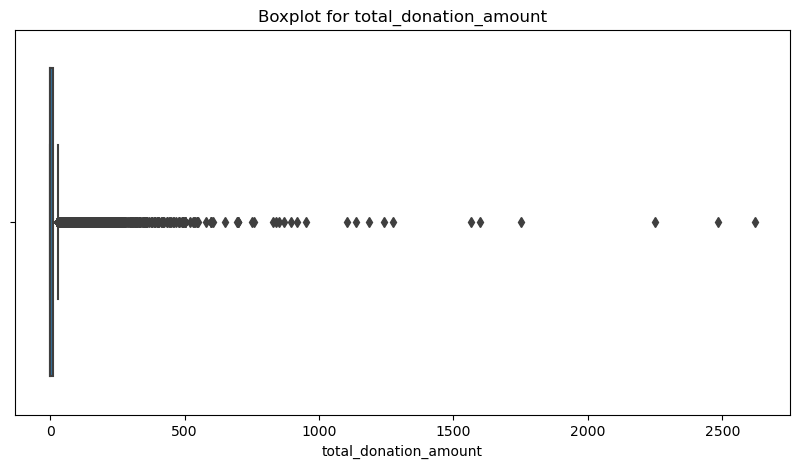

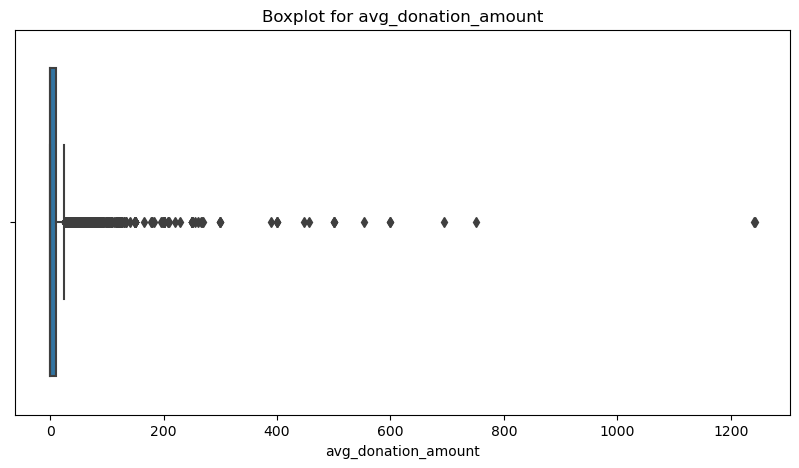

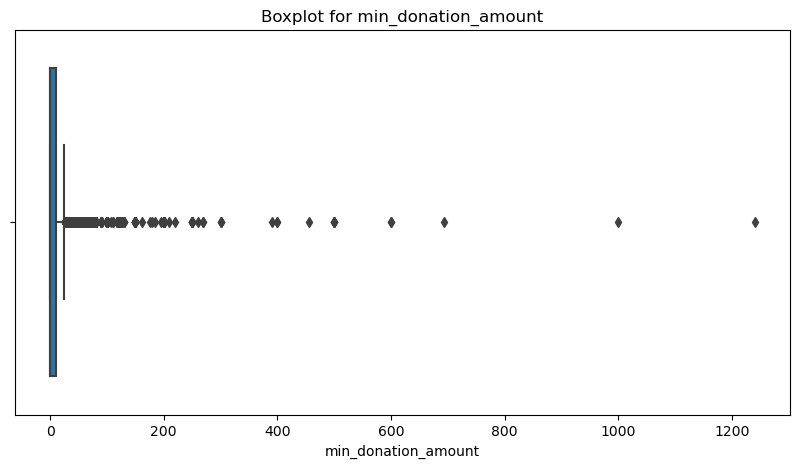

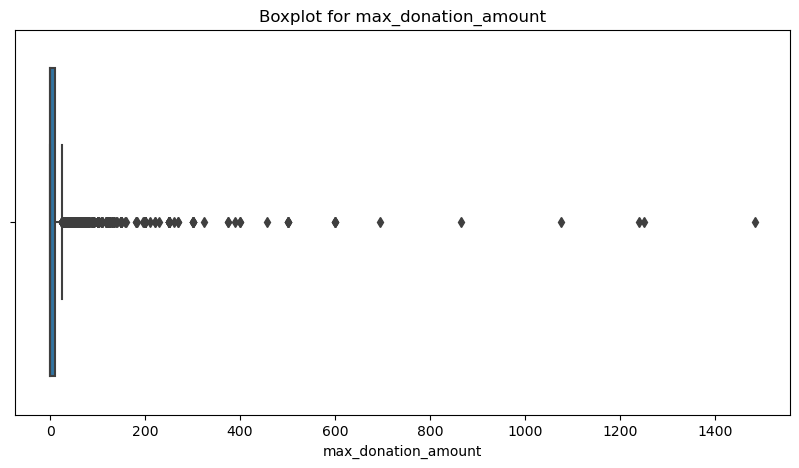

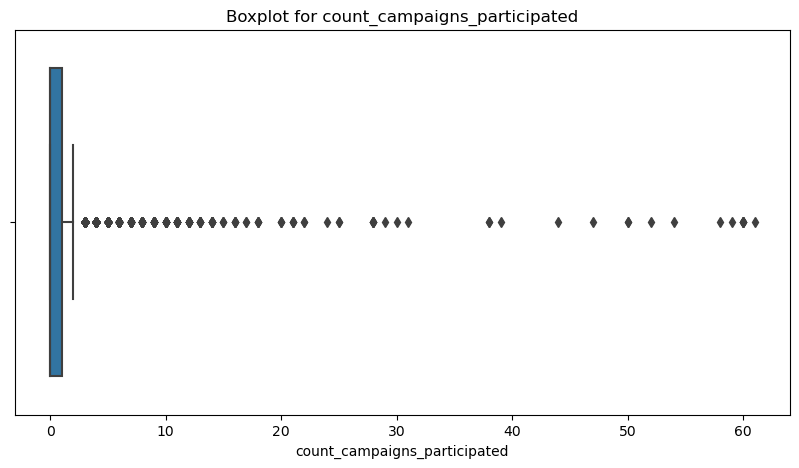

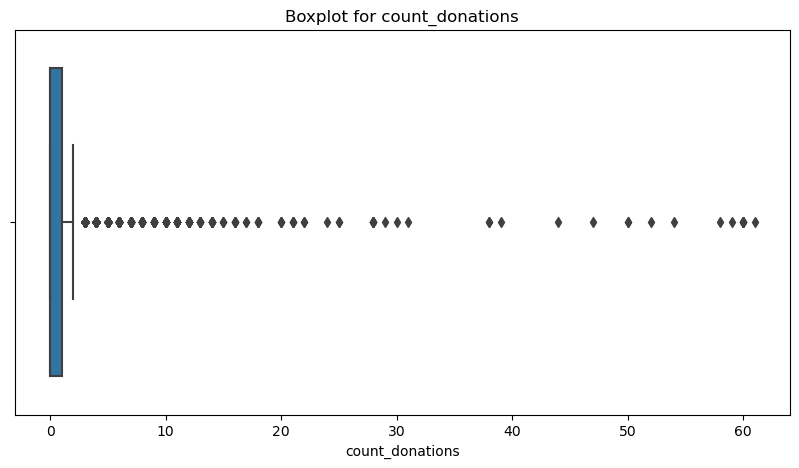

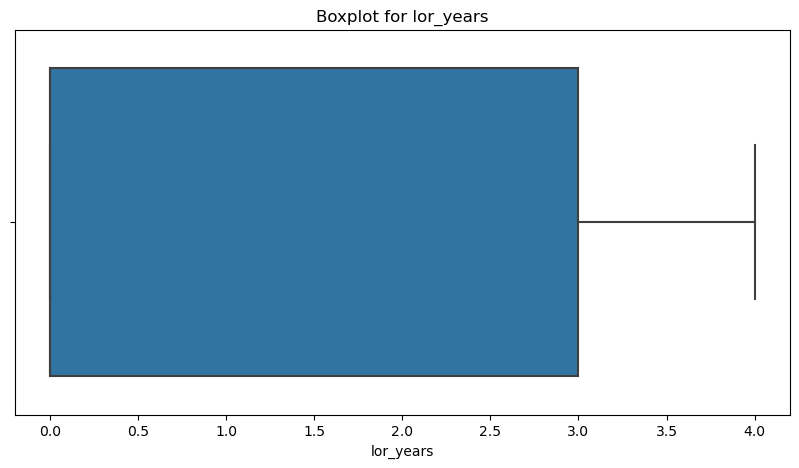

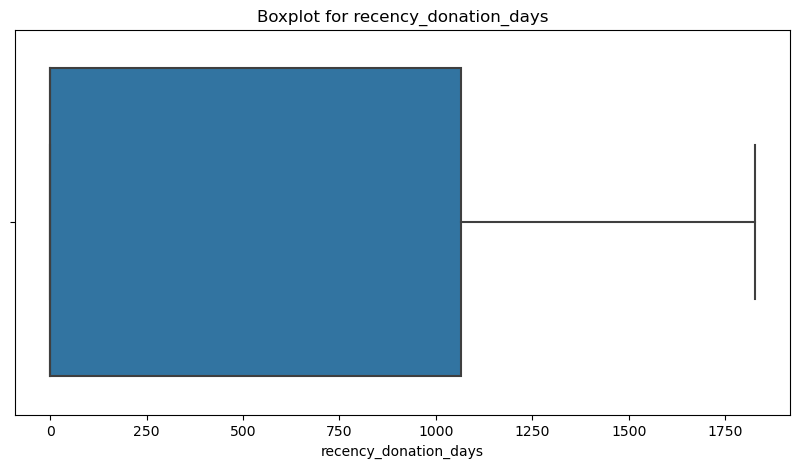

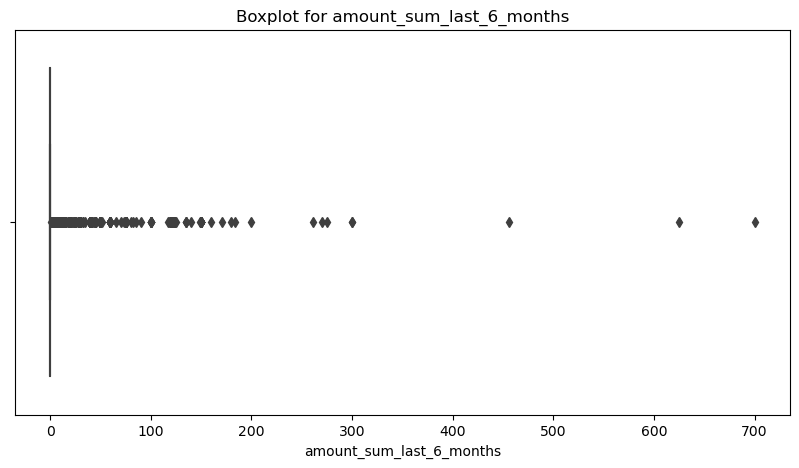

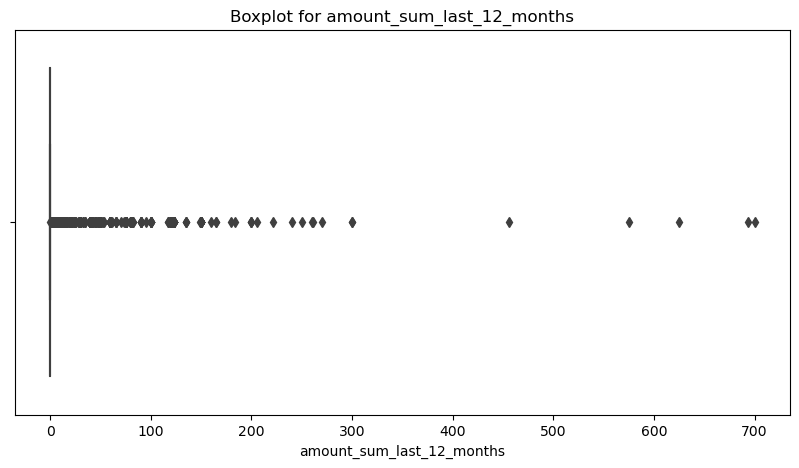

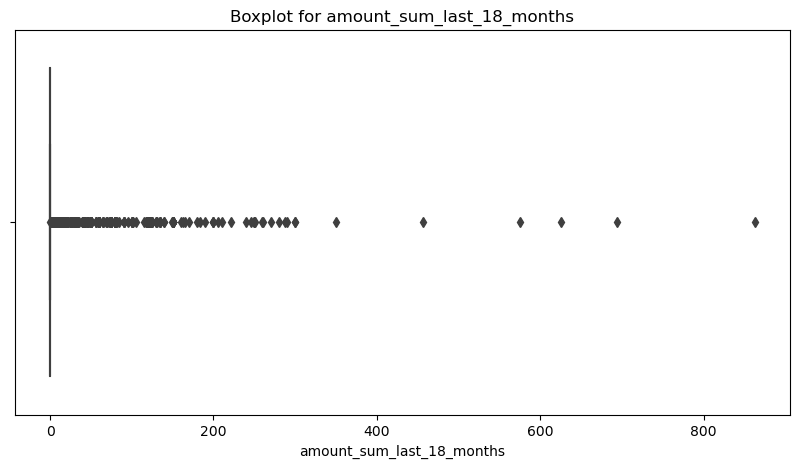

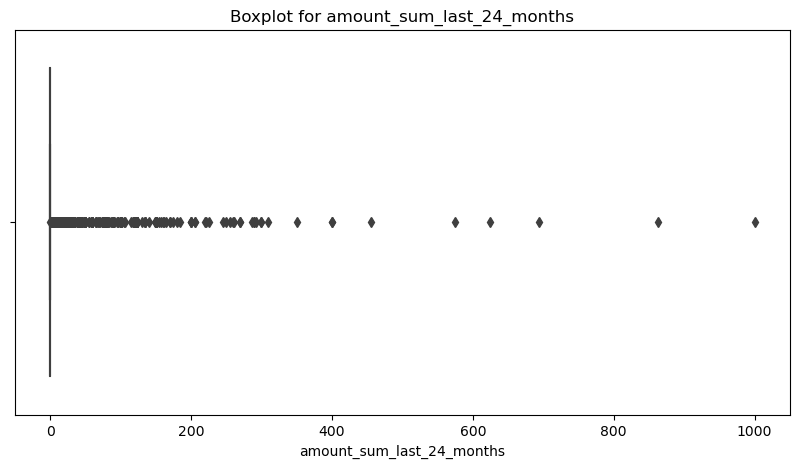

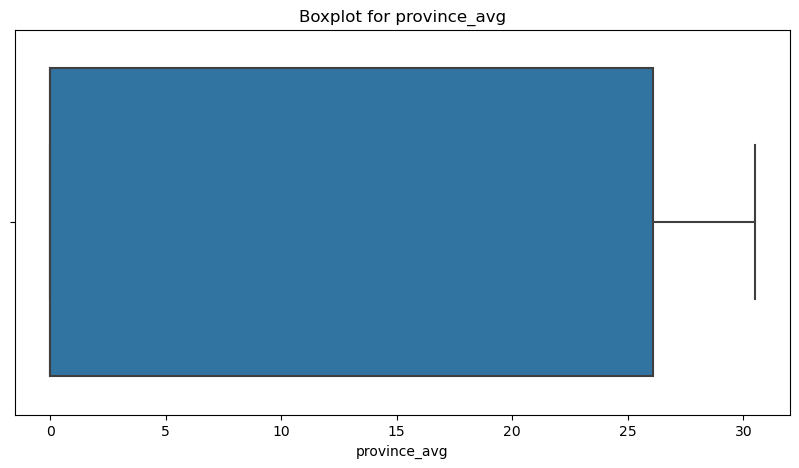

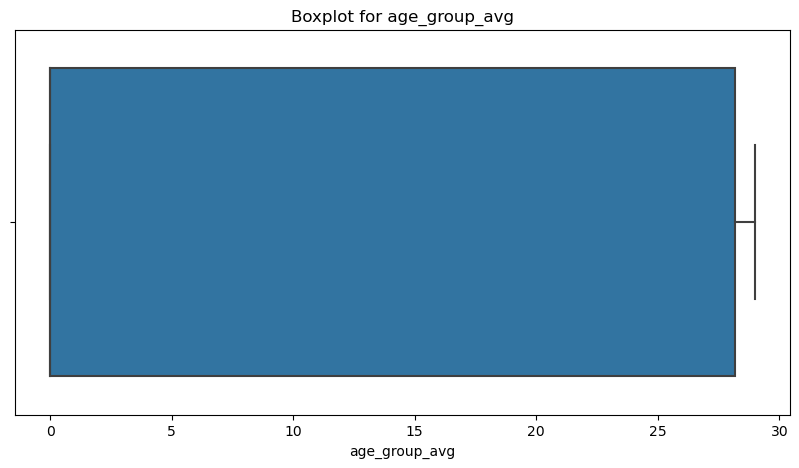

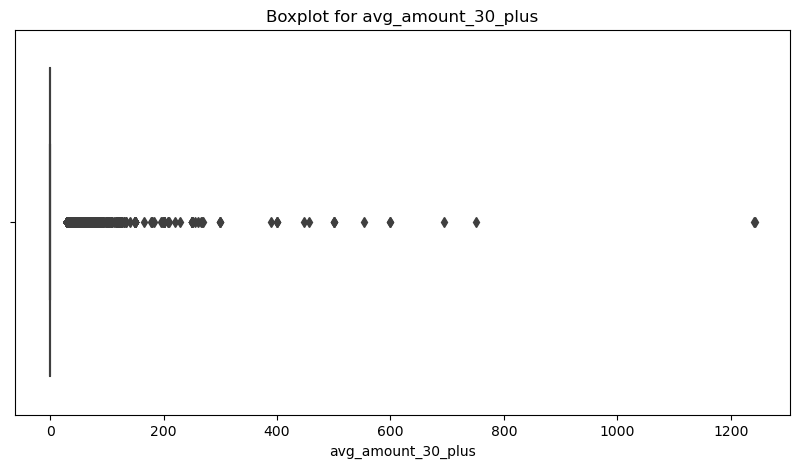

In [104]:
exclude_columns = ['donorID']

# Loop through the numerical columns and create a boxplot for each one, excluding the specified columns
for column in train1.select_dtypes(include=['float64', 'int64']).columns:
    if column not in exclude_columns:
        plt.figure(figsize=(10, 5))  # Set the figure size for better visibility
        sns.boxplot(x=train1[column])  # Create a boxplot for the current column
        plt.title(f'Boxplot for {column}')  # Set the title for the boxplot
        plt.show() 

## Bar Graph

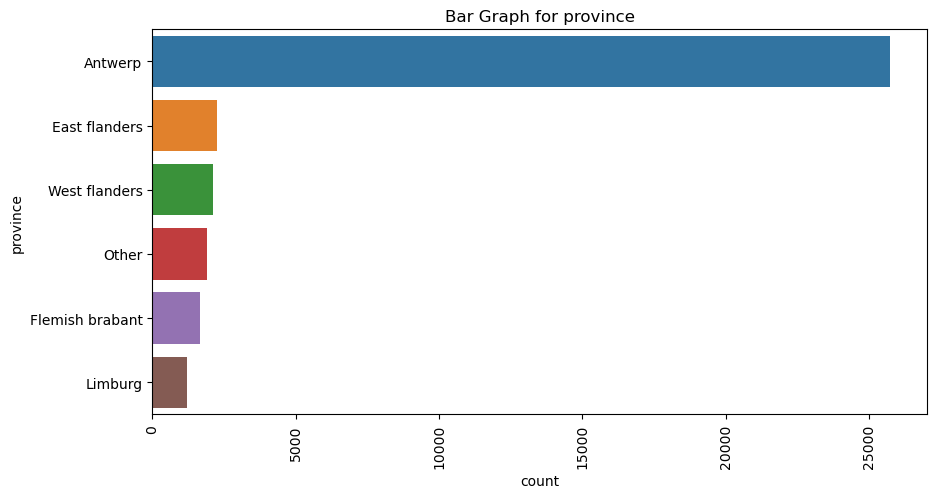

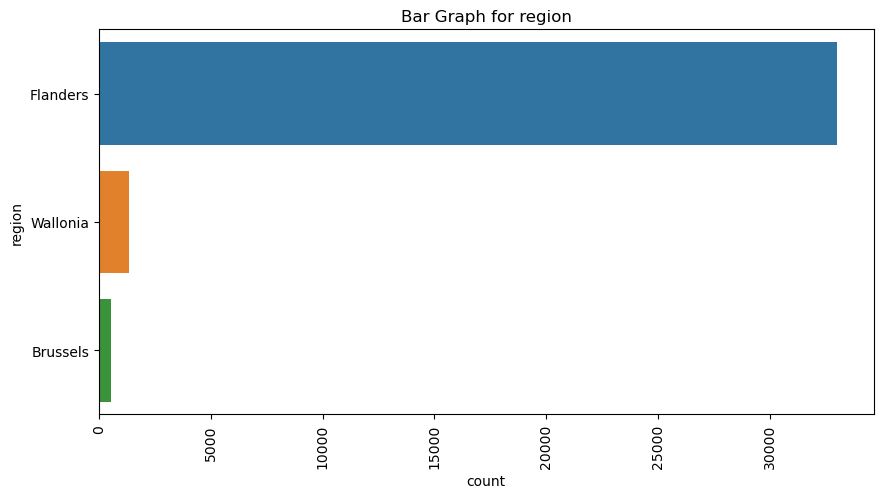

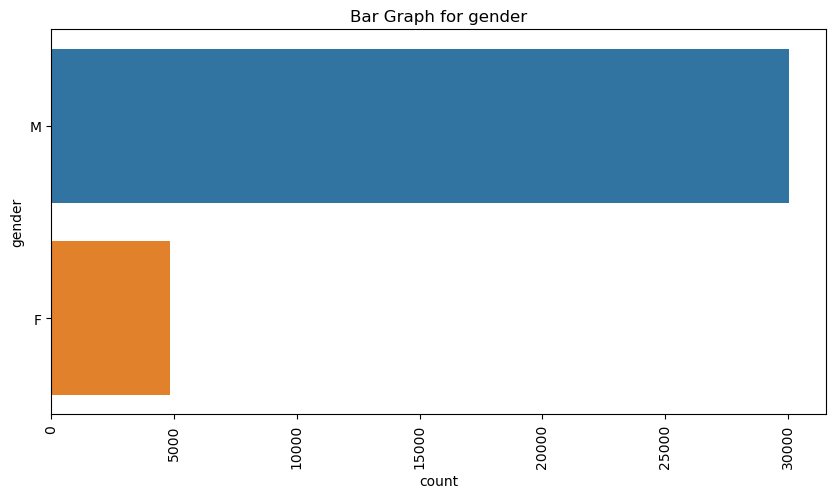

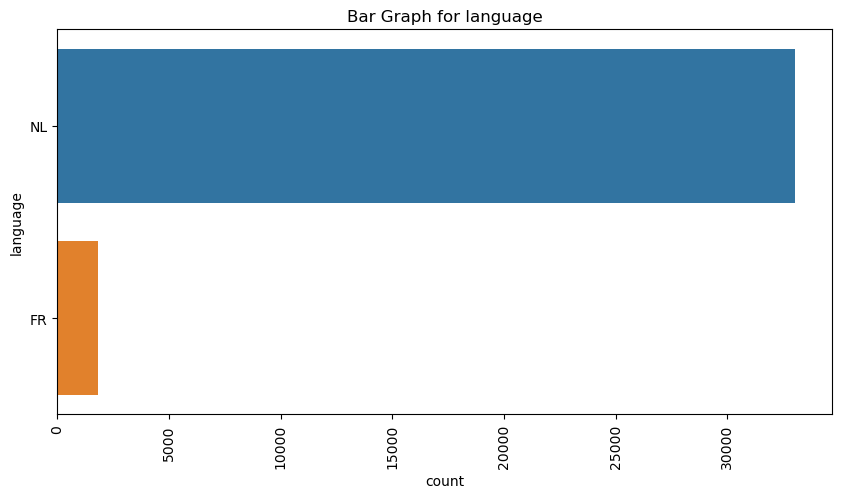

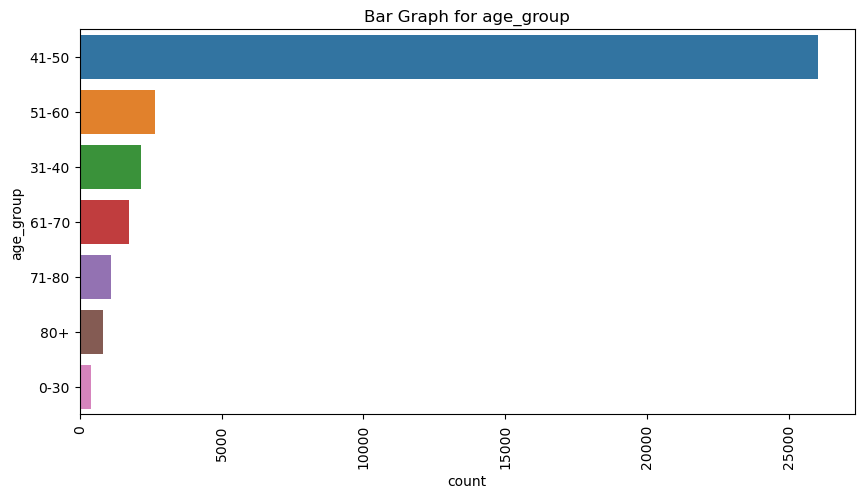

In [105]:
# Loop through the categorical columns and create a bar graph for each one
for v in iv_cat_list:
        plt.figure(figsize=(10, 5))  # Set the figure size for better visibility
        sns.countplot(y=train1[v], order = train1[v].value_counts(normalize=True).index)  # Create a bar graph for the current column
        plt.title(f'Bar Graph for {v}')  # Set the title for the bar graph
        plt.xticks(rotation=90)  # Rotate x labels for better readability if needed
        plt.show() 

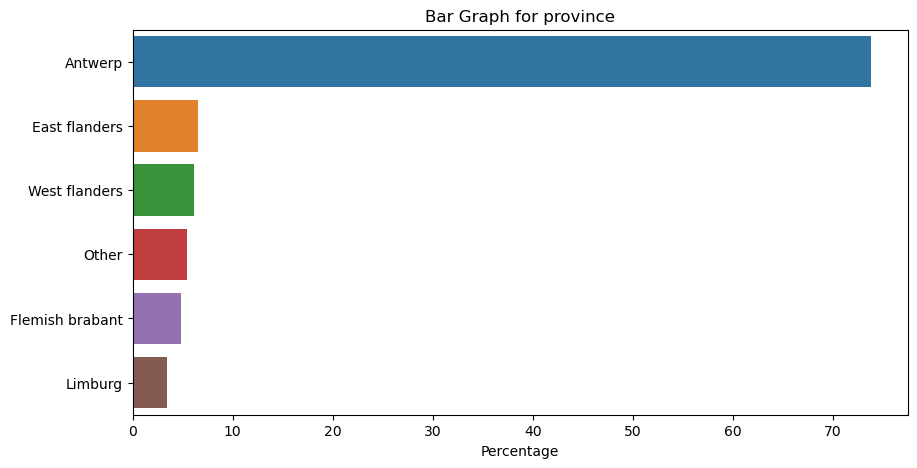

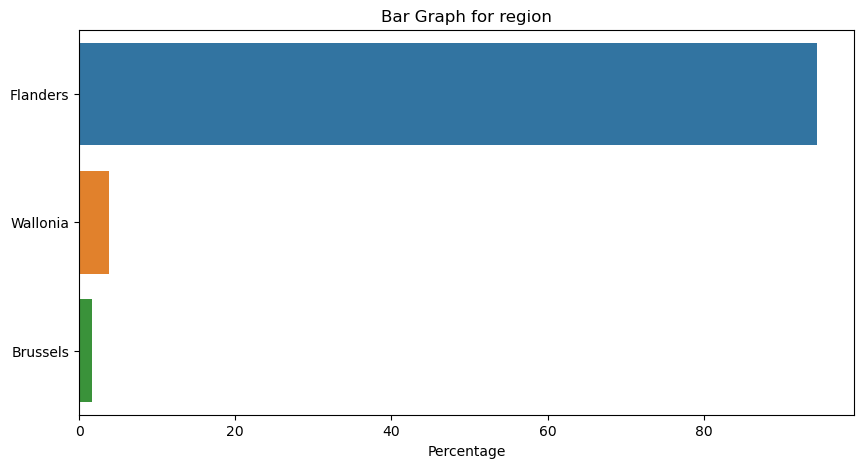

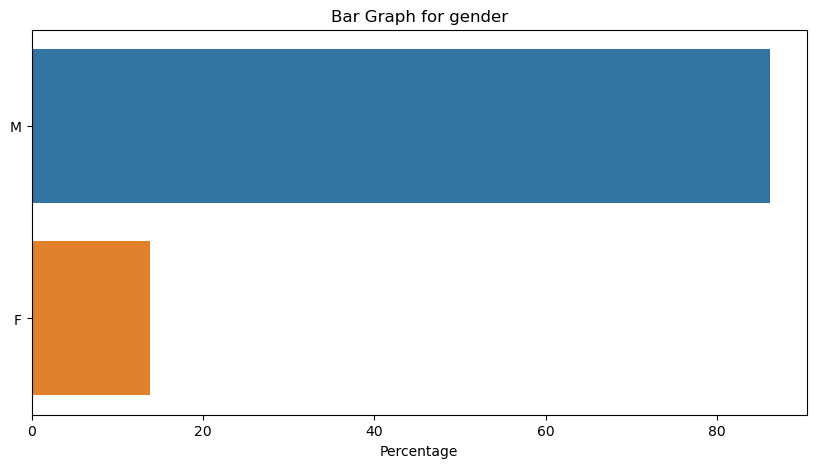

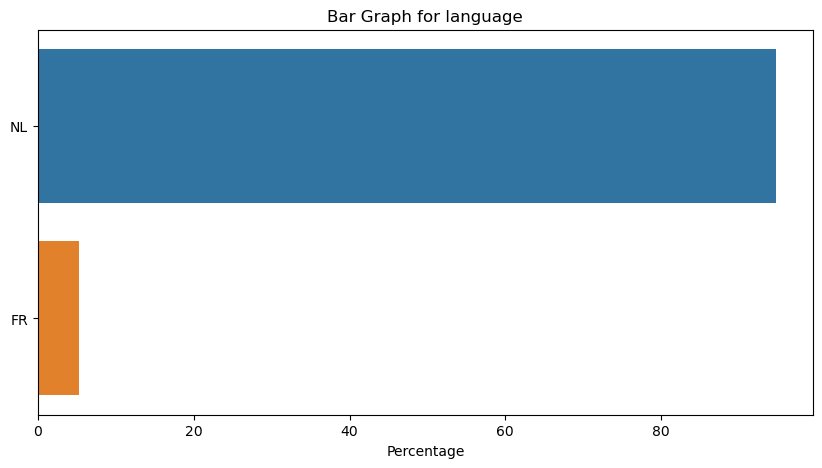

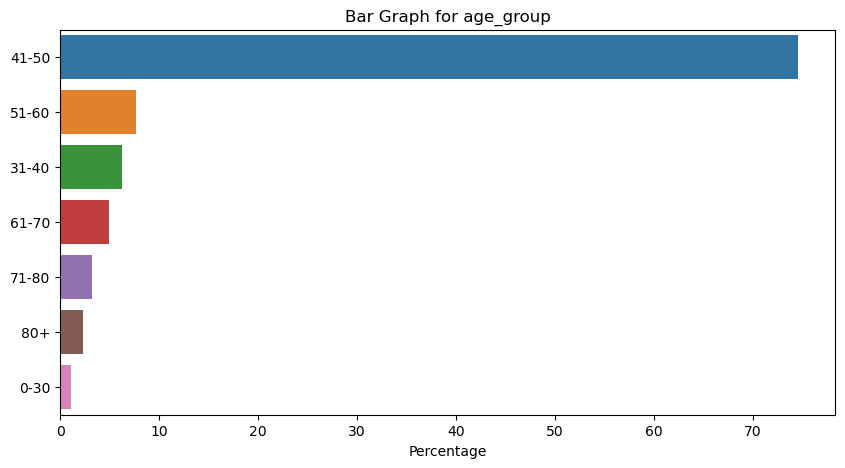

In [106]:
# Loop through the categorical columns and create a bar graph for each one
for v in iv_cat_list:
    plt.figure(figsize=(10, 5))  # Set the figure size for better visibility
    category_counts = train1[v].value_counts()
    category_percentages = category_counts / category_counts.sum() * 100  # Calculate percentages
    sns.barplot(y=category_percentages.index, x=category_percentages, order=category_counts.index)  # Plot percentages
    plt.title(f'Bar Graph for {v}')  # Set the title for the bar graph
    plt.xlabel('Percentage')  # Set the x-axis label
    plt.show()


## Heatmap

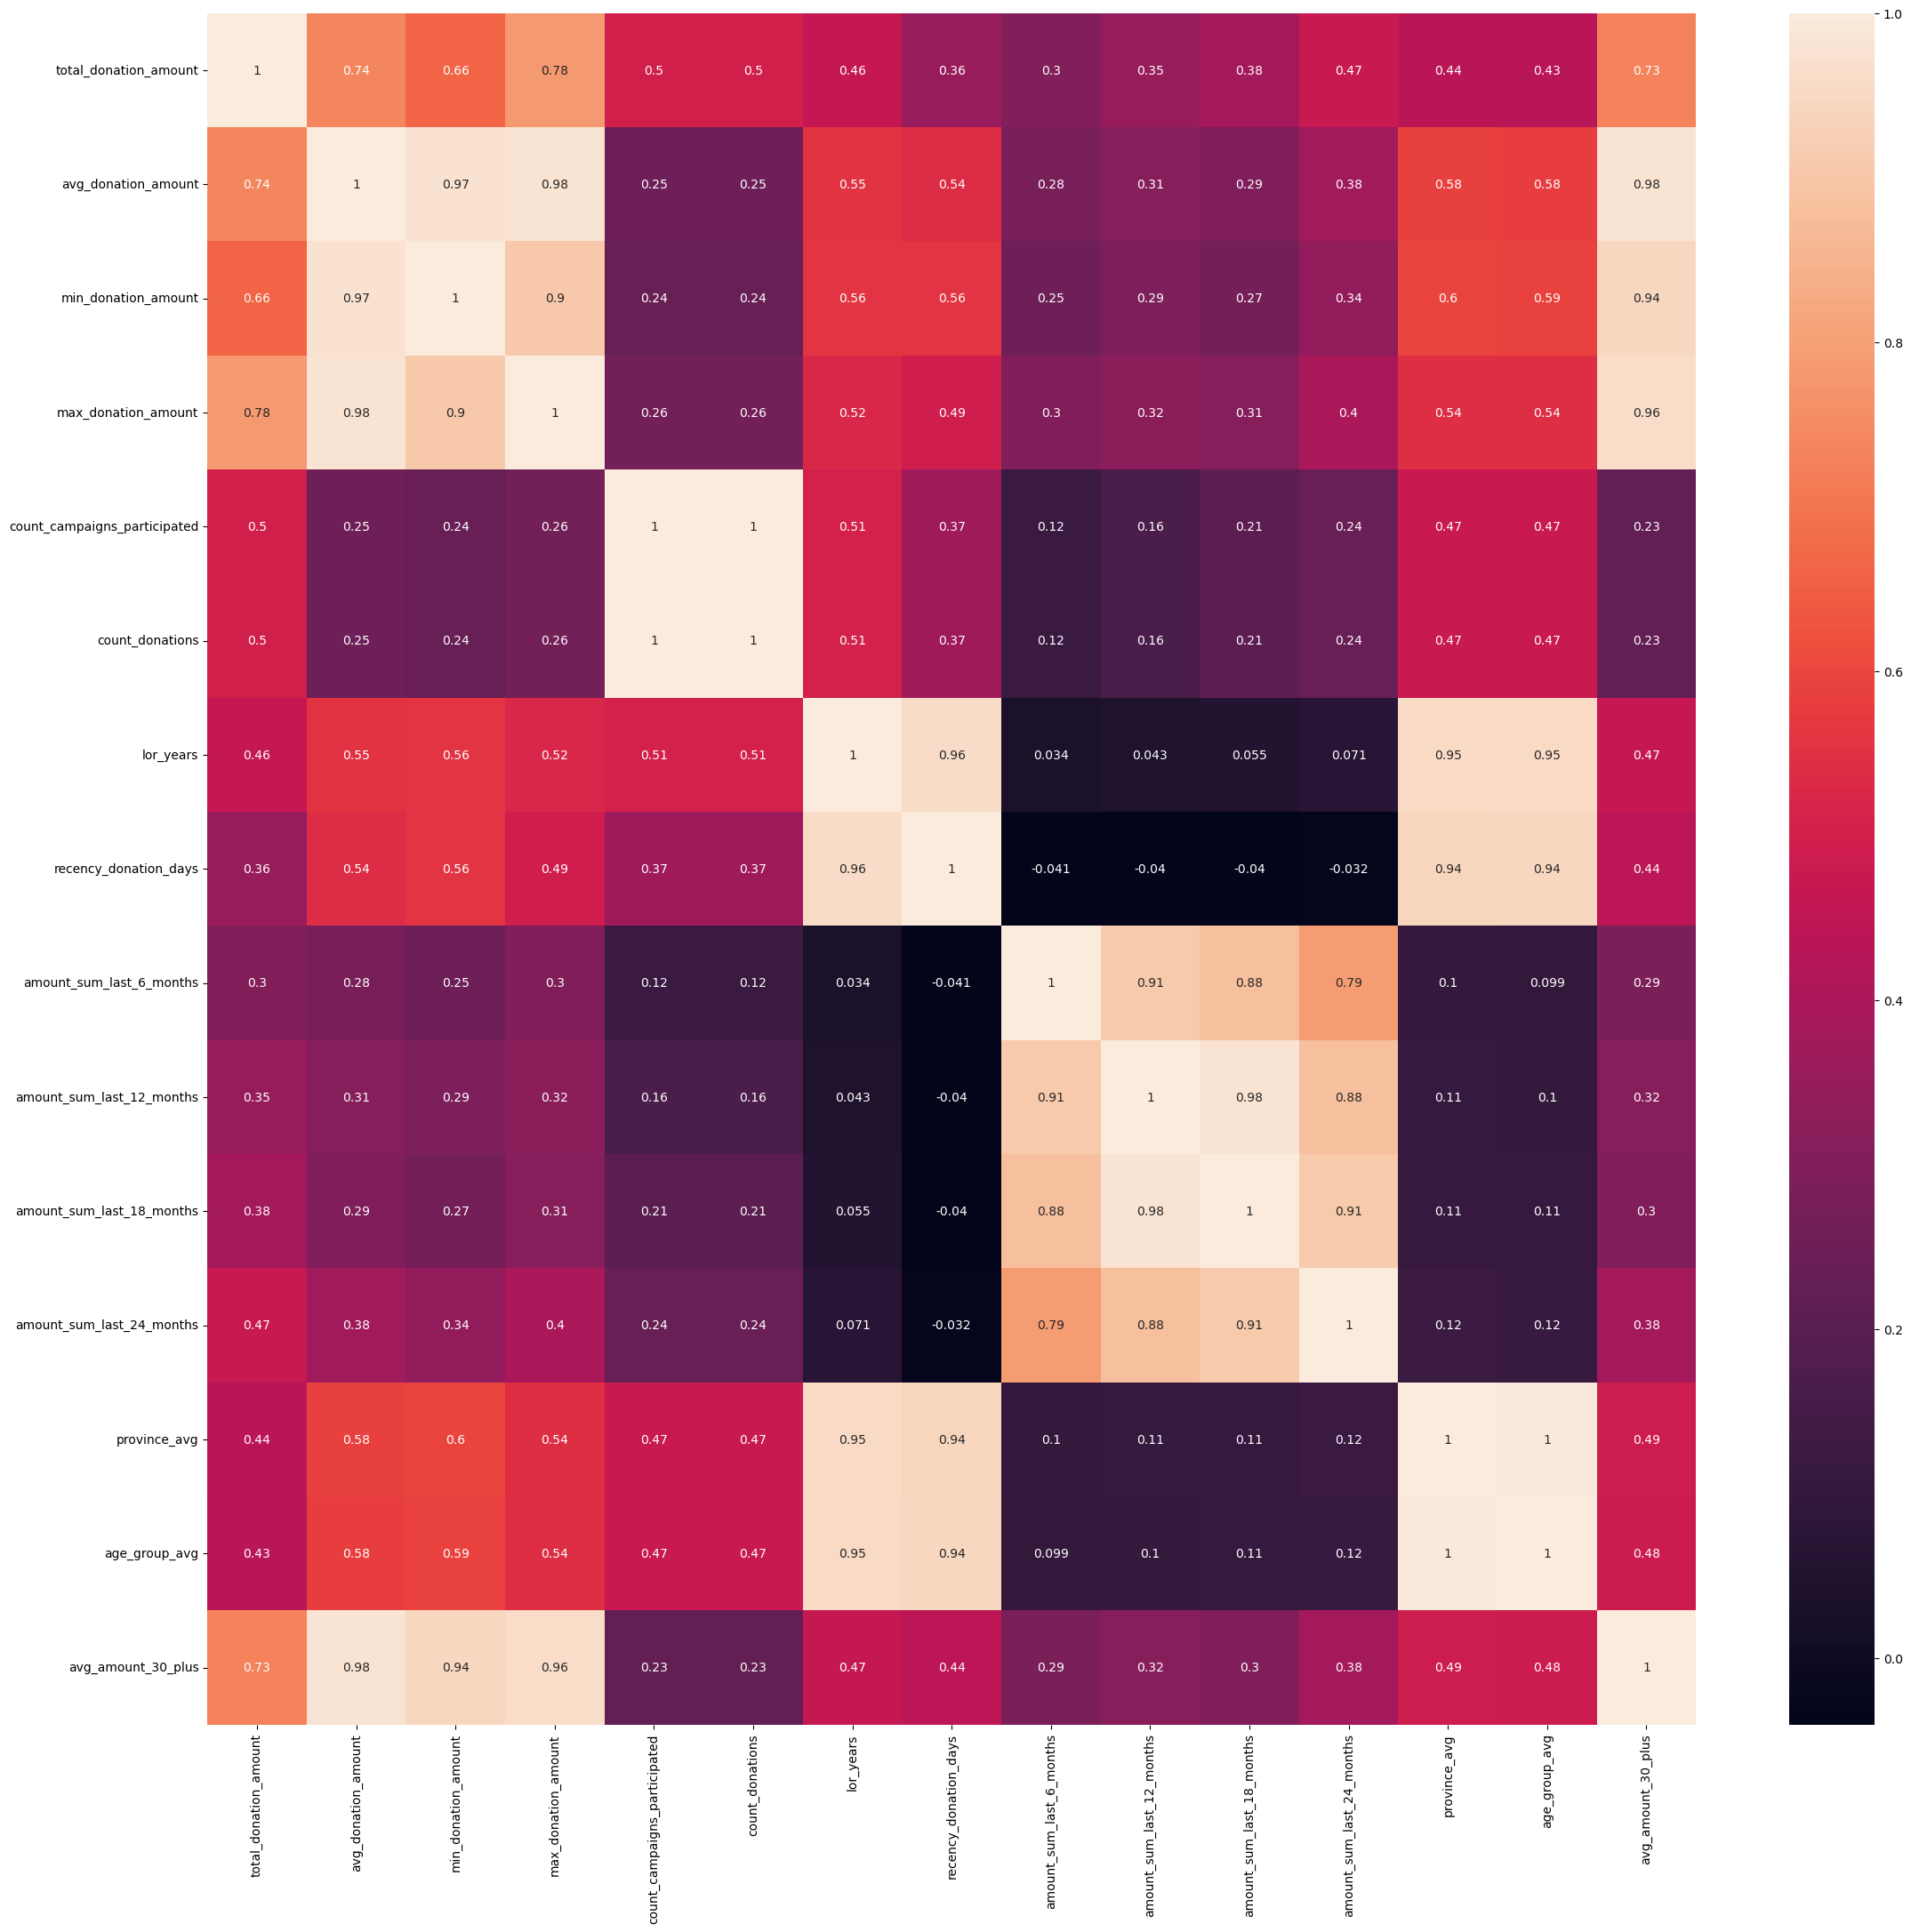

In [107]:
train1 = train1.replace({True: 1, False: 0})

plt.figure(figsize=(27, 25))

# Calculate the correlation matrix
correlations_matrix = train1[iv_num_list].corr()

# Create a heatmap with annotations
sns.heatmap(correlations_matrix, annot=True)

# Show the heatmap
plt.show()

## Profiling target donors

In [108]:
# The aim of this step is to perform a segmentation, so we can give accurate recommendations
# To do that, we merge the train and test datasets, and split it into 2 subsets: target donors and others
# Then we plot the variables distribution for both subsets and analyse the differences to look for strong correlations 

In [109]:
# Filter train1 and test1 based on the donor IDs present in unique_donors_df
train1_subset = train1[train1['donorID'].isin(donors6169['donorID'])]
test1_subset = test1[test1['donorID'].isin(donors7244['donorID'])]

# Concatenate train1_subset and test1_subset
target_df = pd.concat([train1_subset, test1_subset], ignore_index=True)

# Now target_df contains information from both train1 and test1 for the unique donors


In [110]:
# Combine the rest of the population
# Get observations from train1 with donorID not in combined_df
train1_non_target = train1[~train1['donorID'].isin(target_df['donorID'])]

# Get observations from test1 with donorID not in combined_df
test1_non_target = test1[~test1['donorID'].isin(target_df['donorID'])]

# Concatenate train1_non_target and test1_non_target
combined_non_target = pd.concat([train1_non_target, test1_non_target], ignore_index=True)


In [111]:
target_df

,donorID,province,region,gender,language,age_group,total_donation_amount,avg_donation_amount,min_donation_amount,max_donation_amount,count_campaigns_participated,count_donations,lor_years,recency_donation_days,amount_sum_last_6_months,amount_sum_last_12_months,amount_sum_last_18_months,amount_sum_last_24_months,province_avg,age_group_avg,avg_amount_30_plus,total_donation_amount_na,avg_donation_amount_na,min_donation_amount_na,max_donation_amount_na,count_campaigns_participated_na,count_donations_na,lor_years_na,recency_donation_days_na,amount_sum_last_6_months_na,amount_sum_last_12_months_na,amount_sum_last_18_months_na,amount_sum_last_24_months_na,province_avg_na,age_group_avg_na,avg_amount_30_plus_na,made_30_plus_gift
0,D100126,Other,Brussels,M,NL,31-40,52.0,52.000,52.0,52.0,1.0,1.0,2.0,1031.0,0.0,0.0,0.0,0.0,24.212148,28.176598,52.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,D100253,Flemish brabant,Flanders,M,NL,61-70,96.2,48.100,45.5,50.7,2.0,2.0,4.0,1370.0,0.0,0.0,0.0,0.0,28.919124,27.575195,48.100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,D100279,Flemish brabant,Flanders,M,NL,41-50,55.9,55.900,55.9,55.9,1.0,1.0,3.0,1307.0,0.0,0.0,0.0,0.0,28.919124,28.982228,55.900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,D100320,Flemish brabant,Flanders,F,NL,41-50,65.0,65.000,65.0,65.0,1.0,1.0,4.0,1518.0,0.0,0.0,0.0,0.0,28.919124,28.982228,65.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,D100335,Antwerp,Flanders,M,NL,41-50,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,D142982,East flanders,Flanders,M,NL,51-60,44.0,44.000,44.0,44.0,1.0,1.0,2.0,947.0,0.0,0.0,0.0,0.0,30.294403,29.549091,44.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1170,D143214,West flanders,Flanders,F,NL,31-40,44.0,44.000,44.0,44.0,1.0,1.0,2.0,996.0,0.0,0.0,0.0,0.0,31.871087,28.913073,44.000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1171,D143231,Antwerp,Flanders,M,NL,41-50,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1172,D144371,Limburg,Flanders,M,NL,71-80,248.5,62.125,44.0,100.0,4.0,4.0,3.0,117.0,100.0,149.5,149.5,149.5,27.471595,31.568304,62.125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [112]:
combined_non_target

,donorID,province,region,gender,language,age_group,total_donation_amount,avg_donation_amount,min_donation_amount,max_donation_amount,count_campaigns_participated,count_donations,lor_years,recency_donation_days,amount_sum_last_6_months,amount_sum_last_12_months,amount_sum_last_18_months,amount_sum_last_24_months,province_avg,age_group_avg,avg_amount_30_plus,total_donation_amount_na,avg_donation_amount_na,min_donation_amount_na,max_donation_amount_na,count_campaigns_participated_na,count_donations_na,lor_years_na,recency_donation_days_na,amount_sum_last_6_months_na,amount_sum_last_12_months_na,amount_sum_last_18_months_na,amount_sum_last_24_months_na,province_avg_na,age_group_avg_na,avg_amount_30_plus_na,made_30_plus_gift
0,D100001,Antwerp,Flanders,M,NL,41-50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
1,D100002,Antwerp,Flanders,M,NL,71-80,20.0,20.0,20.0,20.0,1.0,1.0,2.0,1055.0,0.0,0.0,0.0,0.0,29.651334,28.578540,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,D100004,Antwerp,Flanders,M,NL,41-50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
3,D100008,Antwerp,Flanders,M,NL,41-50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
4,D100009,Antwerp,Flanders,M,NL,41-50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59158,D144682,Flemish brabant,Flanders,M,FR,41-50,40.0,40.0,40.0,40.0,1.0,1.0,2.0,969.0,0.0,0.0,0.0,0.0,31.081218,29.948911,40.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59159,D144683,East flanders,Flanders,M,NL,31-40,50.0,50.0,50.0,50.0,1.0,1.0,3.0,1302.0,0.0,0.0,0.0,0.0,30.294403,28.913073,50.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59160,D144686,Antwerp,Flanders,F,NL,51-60,50.0,50.0,50.0,50.0,1.0,1.0,4.0,1498.0,0.0,0.0,0.0,0.0,31.172514,29.549091,50.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59161,D144690,Flemish brabant,Flanders,M,FR,41-50,40.0,40.0,40.0,40.0,1.0,1.0,4.0,1617.0,0.0,0.0,0.0,0.0,31.081218,29.948911,40.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [119]:
df_merged = pd.concat([train1, test1], ignore_index=True)
df_merged

,donorID,province,region,gender,language,age_group,total_donation_amount,avg_donation_amount,min_donation_amount,max_donation_amount,count_campaigns_participated,count_donations,lor_years,recency_donation_days,amount_sum_last_6_months,amount_sum_last_12_months,amount_sum_last_18_months,amount_sum_last_24_months,province_avg,age_group_avg,avg_amount_30_plus,total_donation_amount_na,avg_donation_amount_na,min_donation_amount_na,max_donation_amount_na,count_campaigns_participated_na,count_donations_na,lor_years_na,recency_donation_days_na,amount_sum_last_6_months_na,amount_sum_last_12_months_na,amount_sum_last_18_months_na,amount_sum_last_24_months_na,province_avg_na,age_group_avg_na,avg_amount_30_plus_na,made_30_plus_gift
0,D100001,Antwerp,Flanders,M,NL,41-50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
1,D100002,Antwerp,Flanders,M,NL,71-80,20.0,20.0,20.0,20.0,1.0,1.0,2.0,1055.0,0.0,0.0,0.0,0.0,29.651334,28.578540,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,D100004,Antwerp,Flanders,M,NL,41-50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
3,D100008,Antwerp,Flanders,M,NL,41-50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
4,D100009,Antwerp,Flanders,M,NL,41-50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60528,D144682,Flemish brabant,Flanders,M,FR,41-50,40.0,40.0,40.0,40.0,1.0,1.0,2.0,969.0,0.0,0.0,0.0,0.0,31.081218,29.948911,40.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60529,D144683,East flanders,Flanders,M,NL,31-40,50.0,50.0,50.0,50.0,1.0,1.0,3.0,1302.0,0.0,0.0,0.0,0.0,30.294403,28.913073,50.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60530,D144686,Antwerp,Flanders,F,NL,51-60,50.0,50.0,50.0,50.0,1.0,1.0,4.0,1498.0,0.0,0.0,0.0,0.0,31.172514,29.549091,50.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60531,D144690,Flemish brabant,Flanders,M,FR,41-50,40.0,40.0,40.0,40.0,1.0,1.0,4.0,1617.0,0.0,0.0,0.0,0.0,31.081218,29.948911,40.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


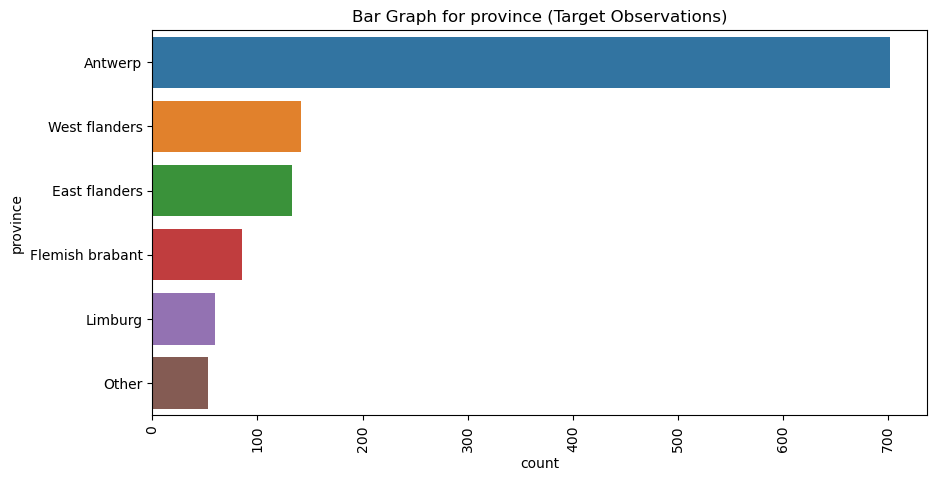

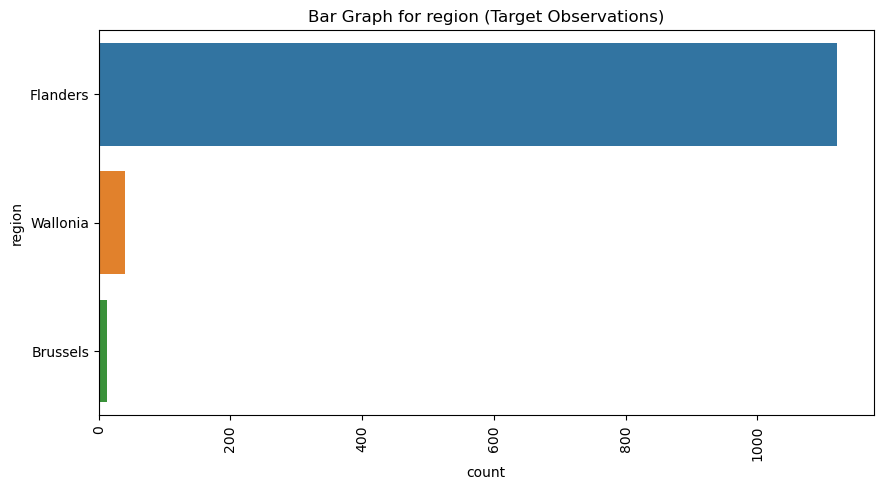

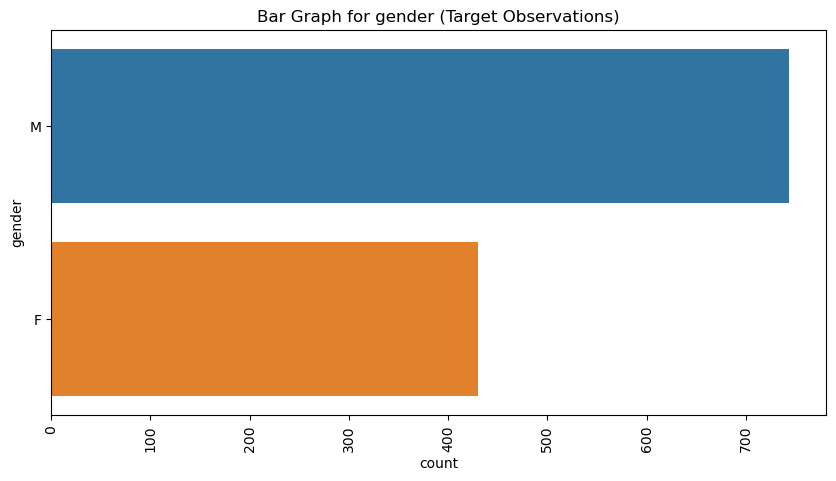

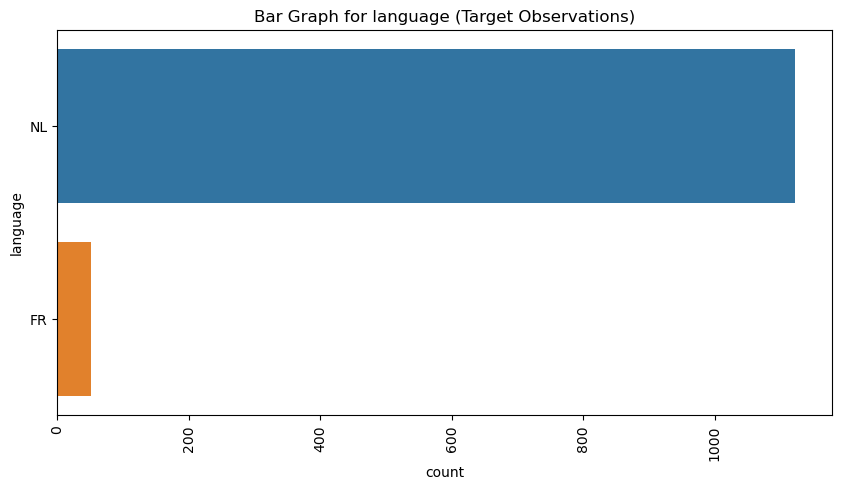

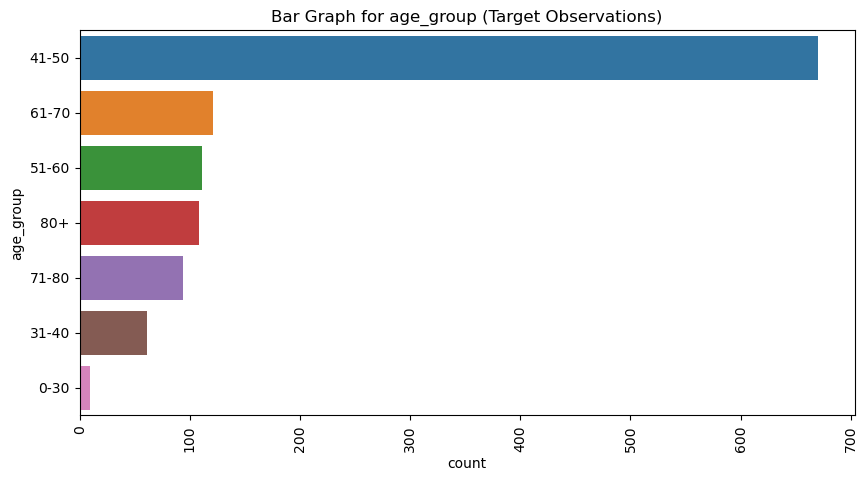

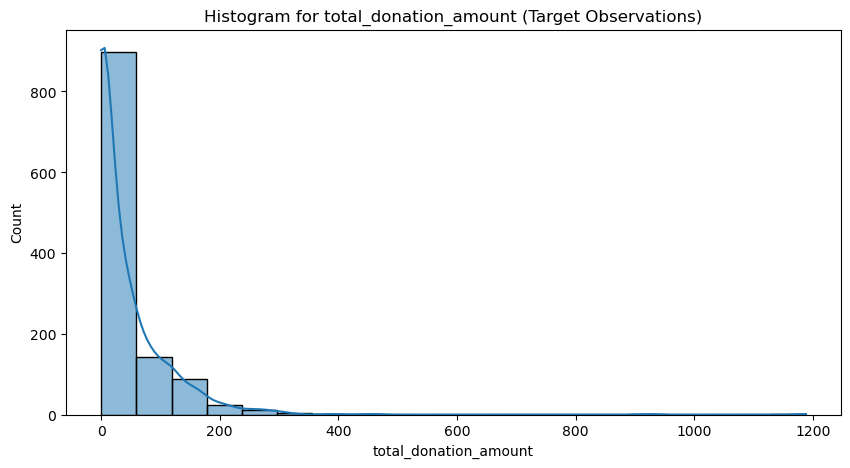

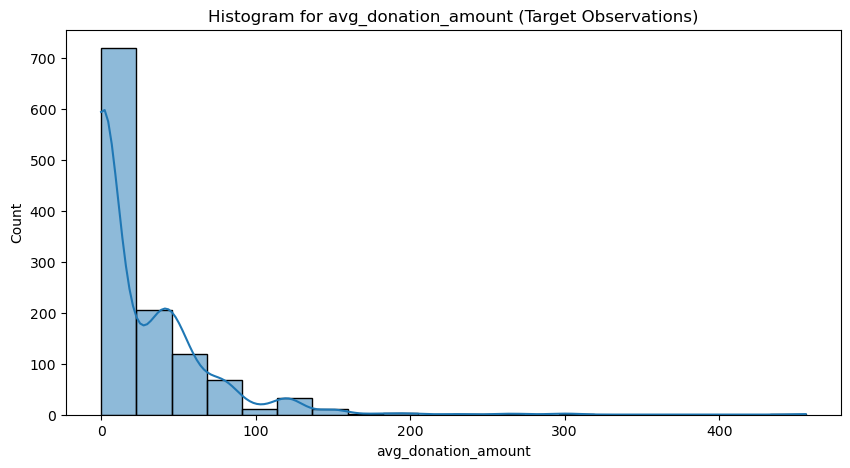

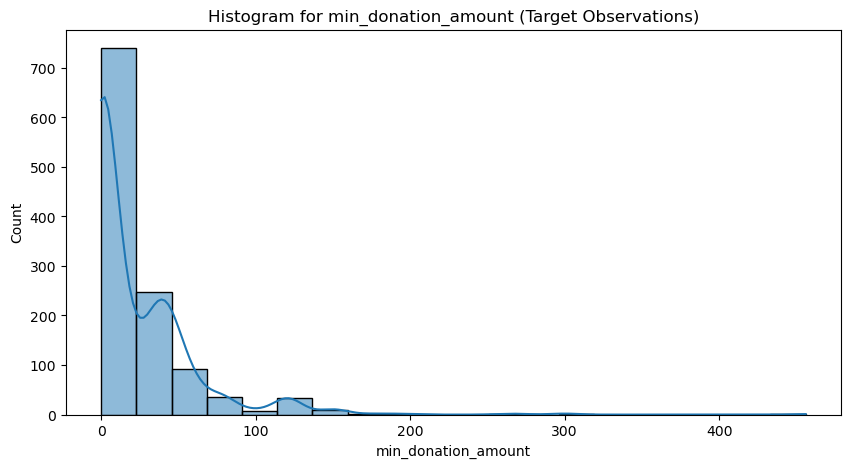

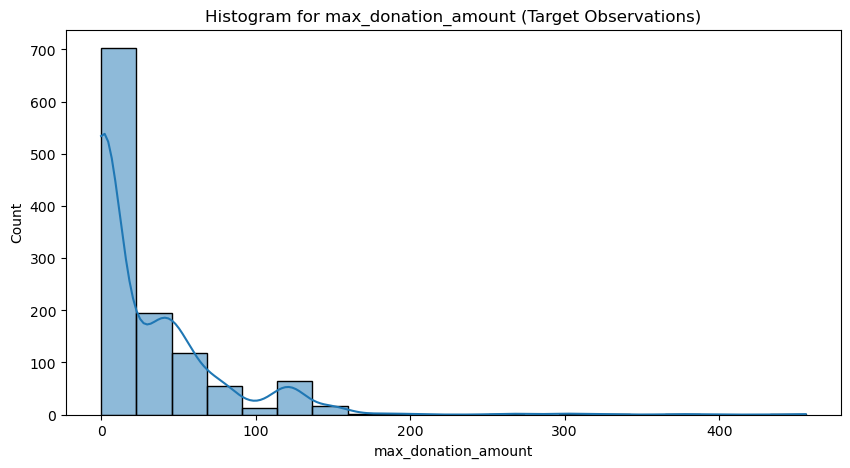

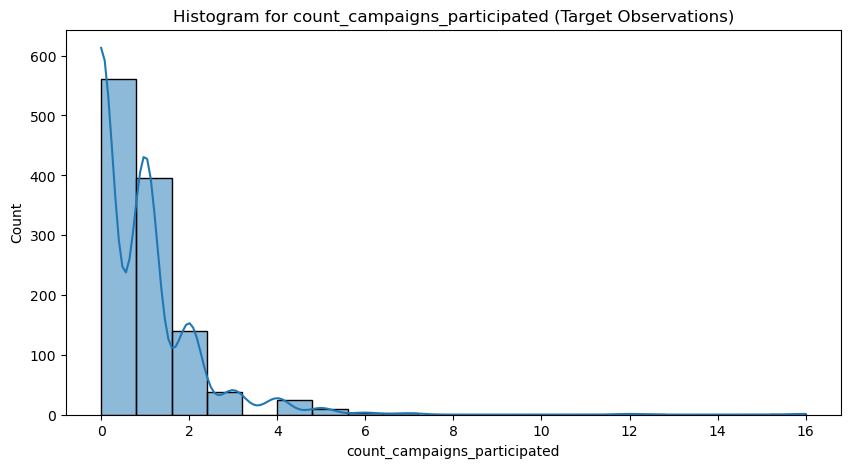

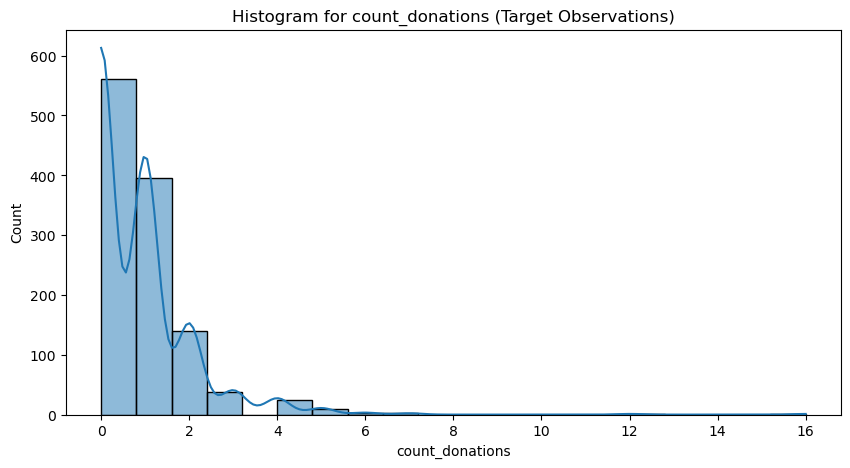

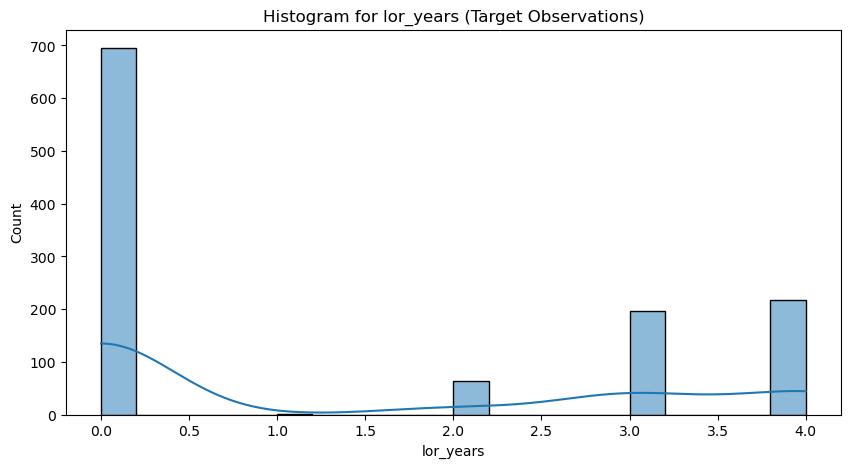

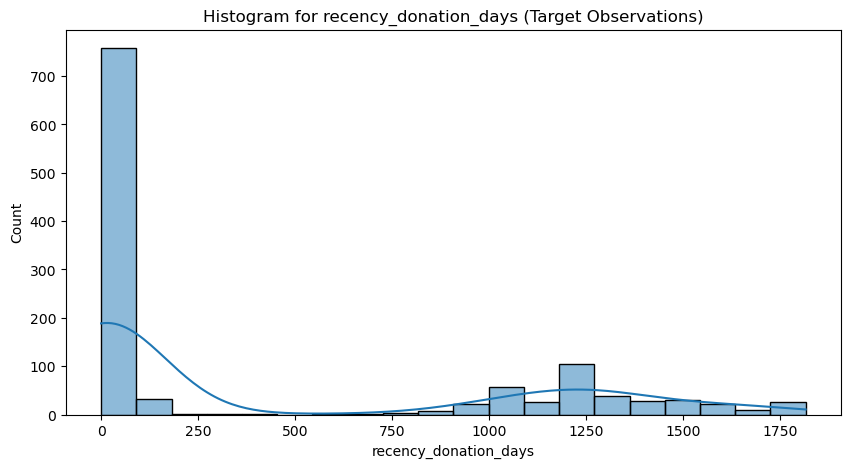

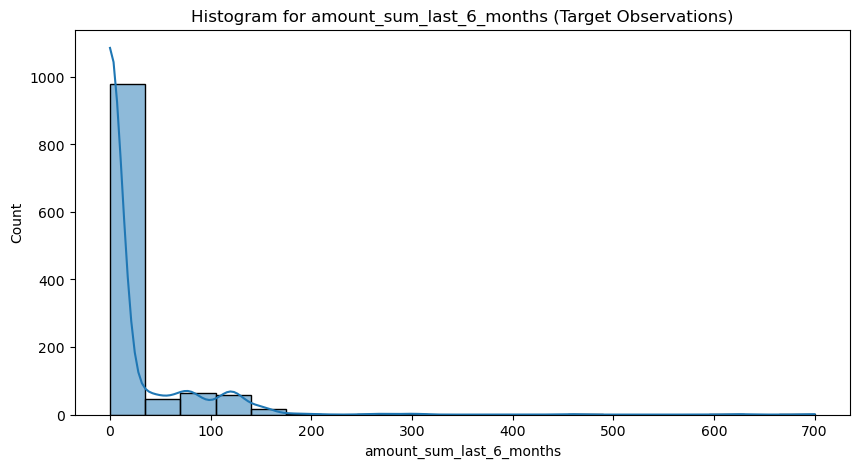

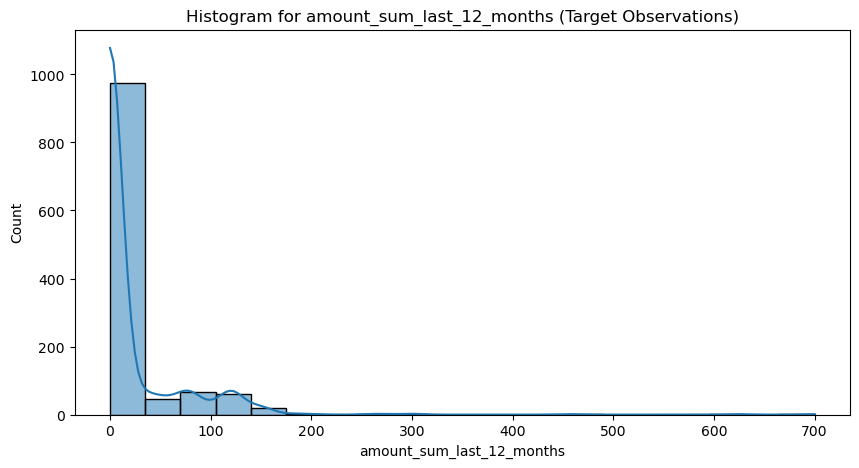

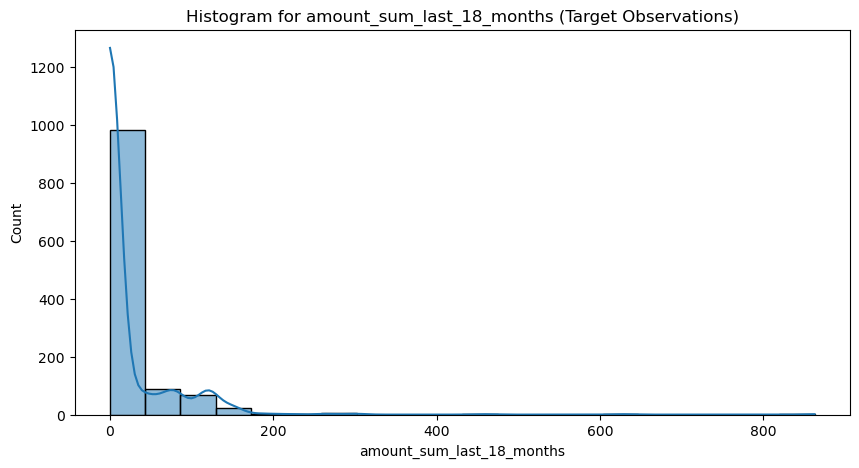

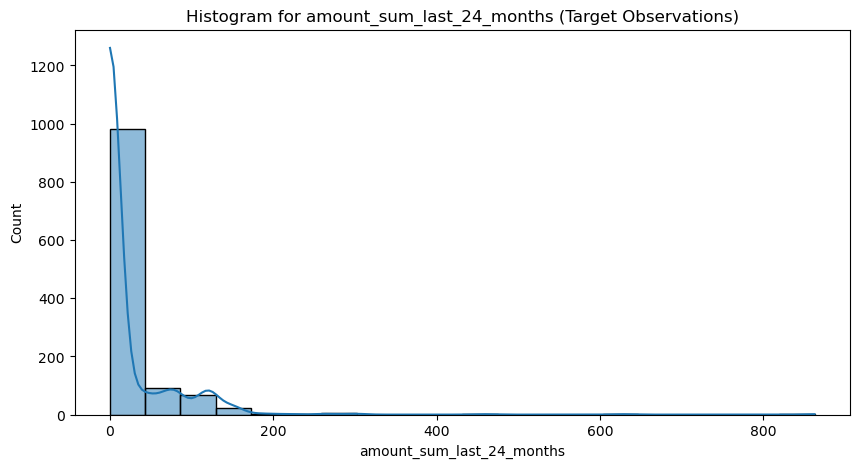

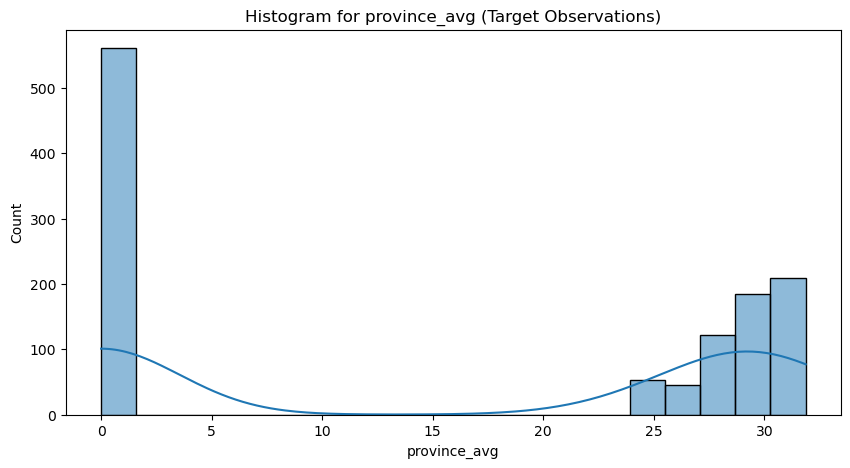

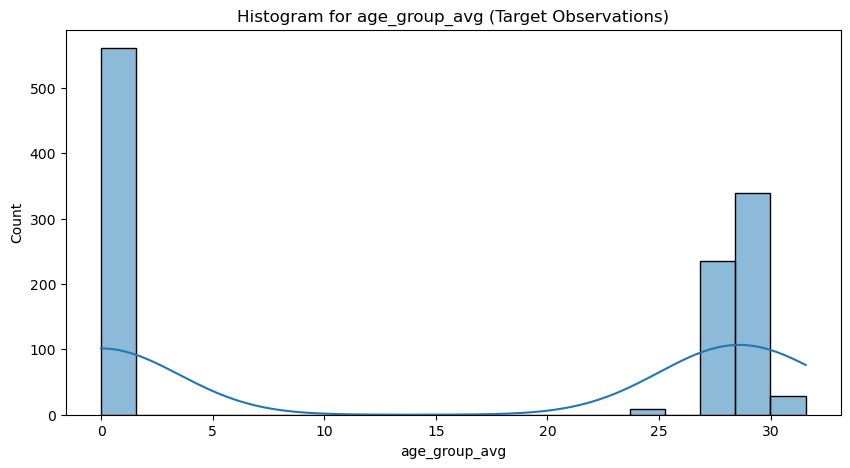

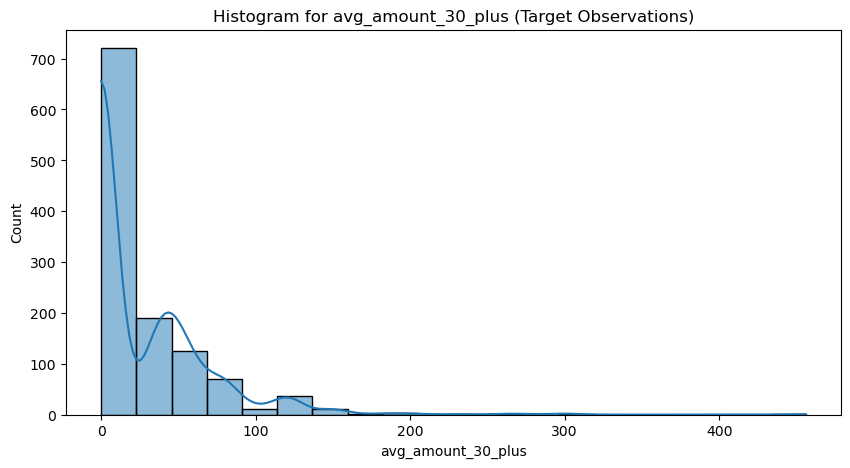

In [114]:
# Plot categorical variables for target observations
for column in iv_cat_list:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=target_df[column], order=target_df[column].value_counts().index)
    plt.title(f'Bar Graph for {column} (Target Observations)')
    plt.xticks(rotation=90)
    plt.show()

# Plot numerical variables for target observations
for column in iv_num_list:
    plt.figure(figsize=(10, 5))
    sns.histplot(target_df[column], bins=20, kde=True)
    plt.title(f'Histogram for {column} (Target Observations)')
    plt.show()



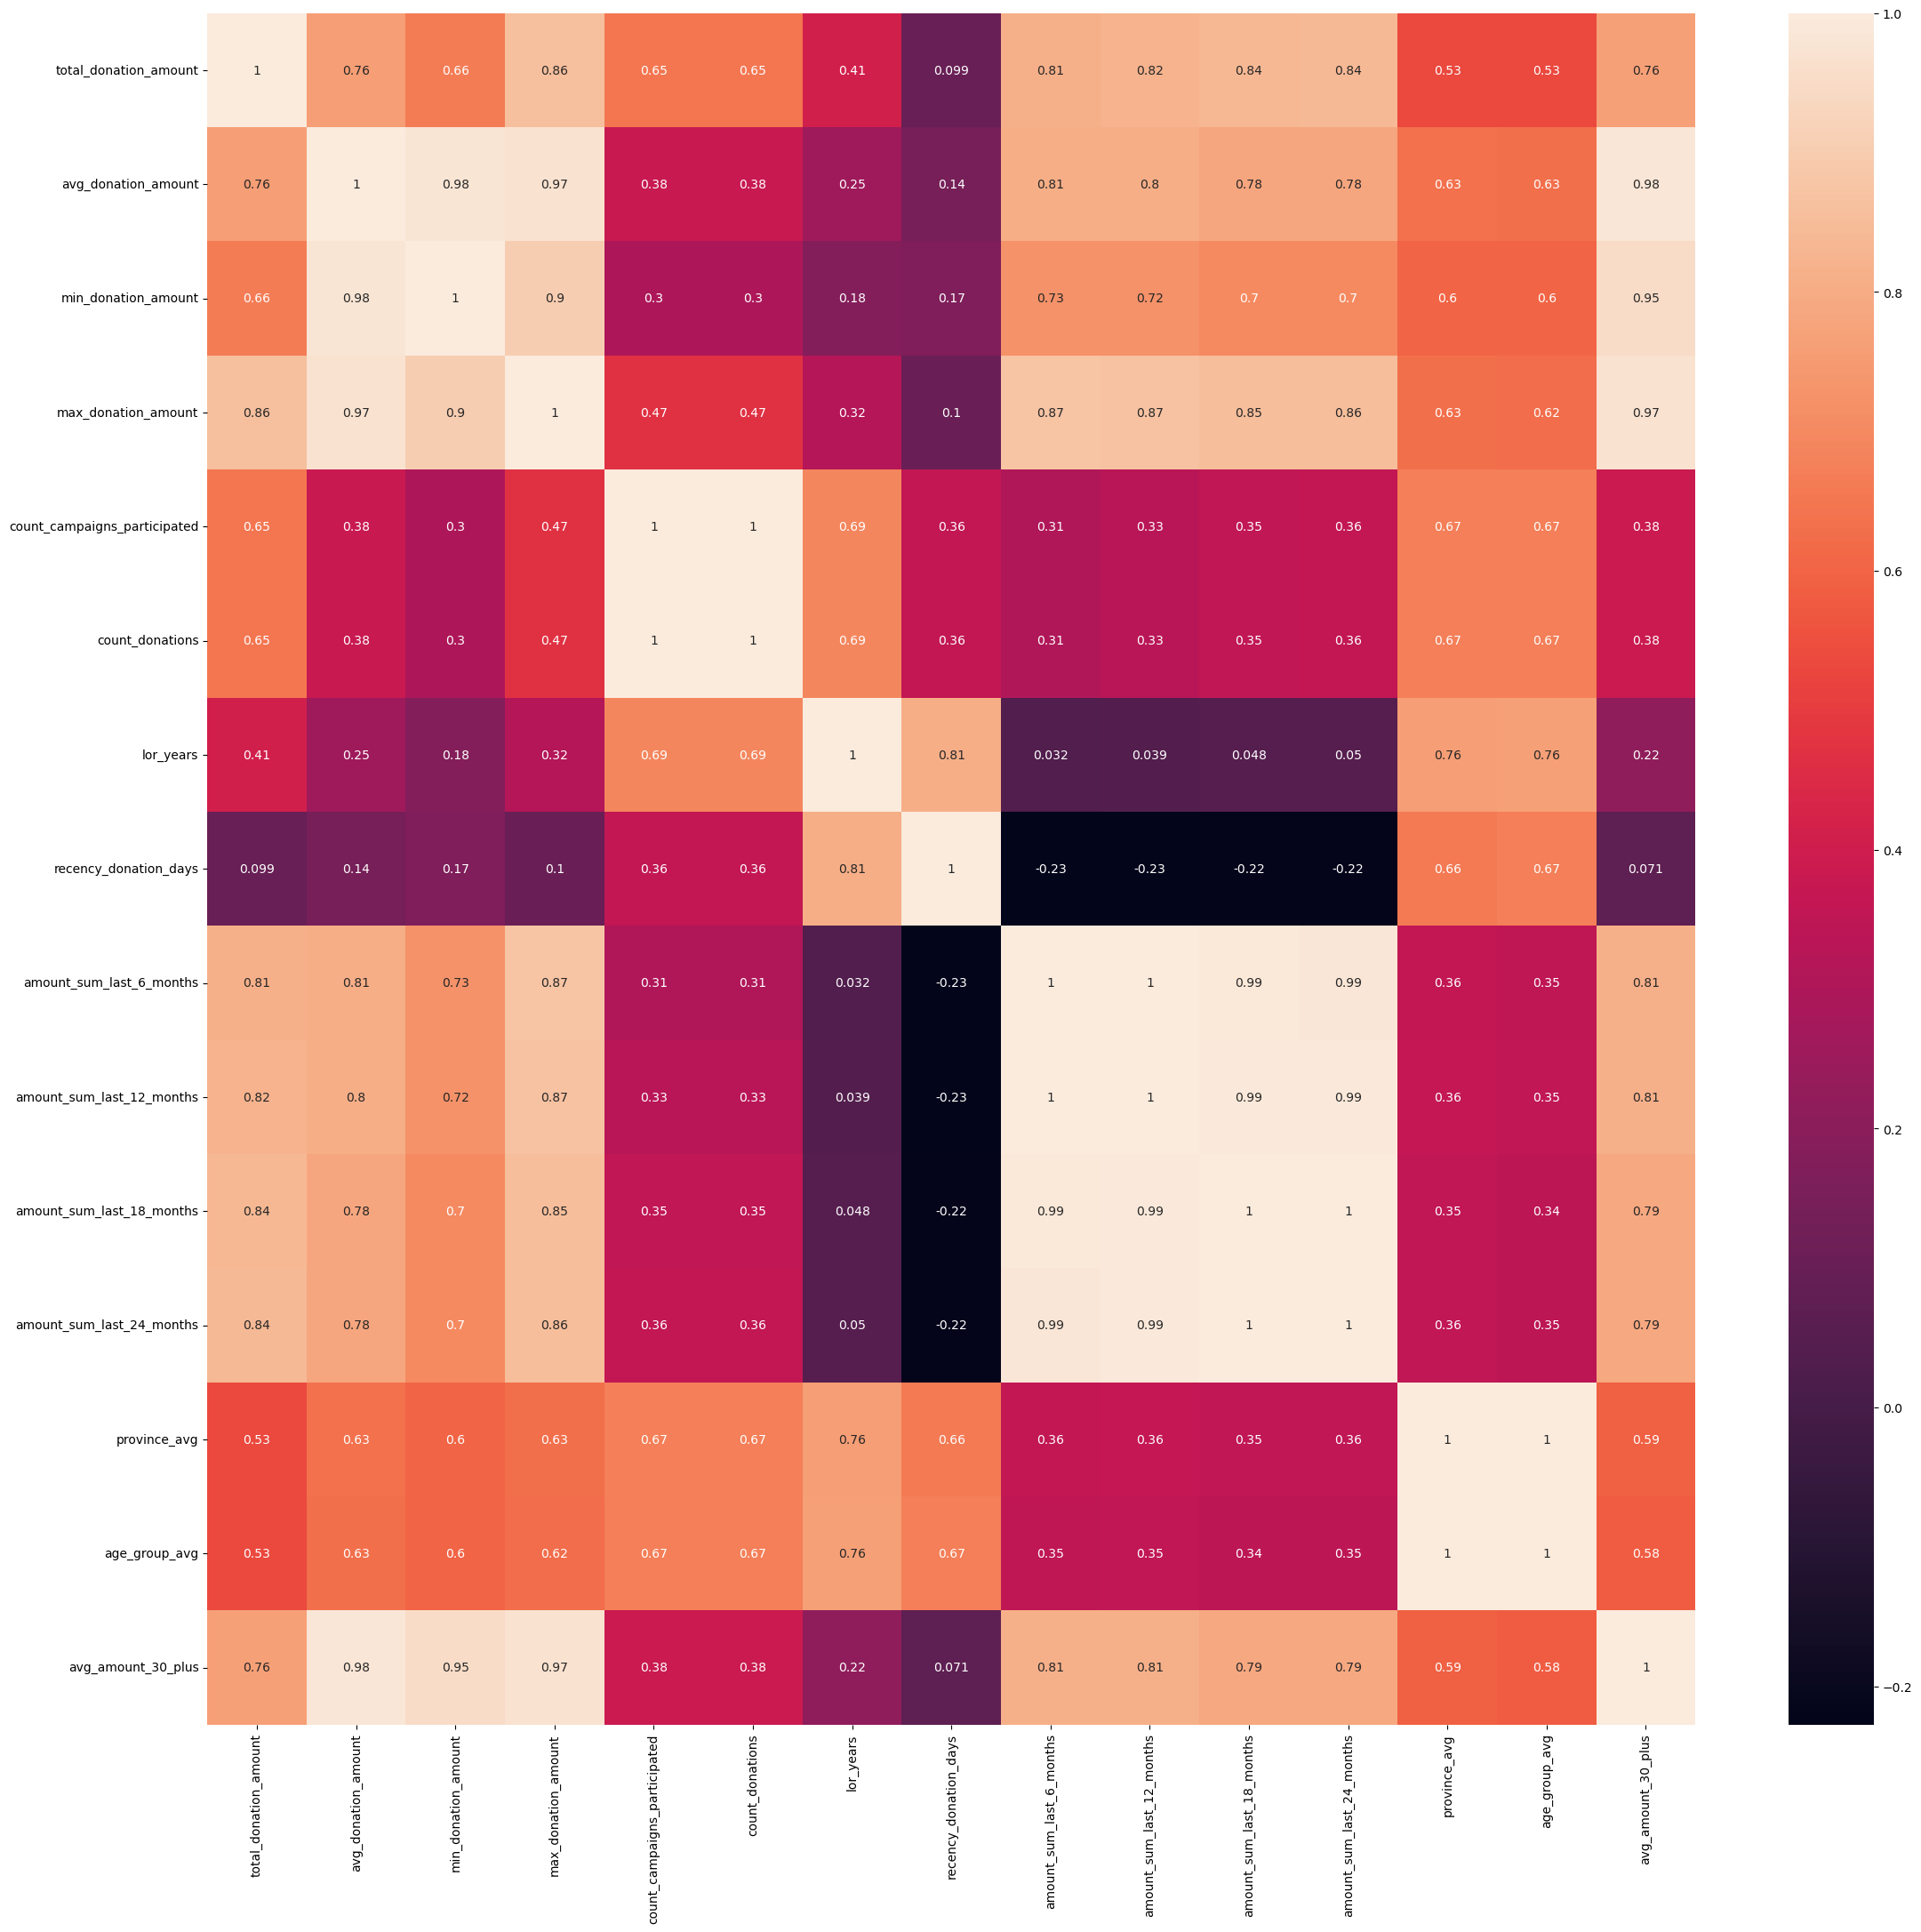

In [115]:
plt.figure(figsize=(27, 25))

# Calculate the correlation matrix
correlations_matrix = target_df[iv_num_list].corr()

# Create a heatmap with annotations
sns.heatmap(correlations_matrix, annot=True)

# Show the heatmap
plt.show()

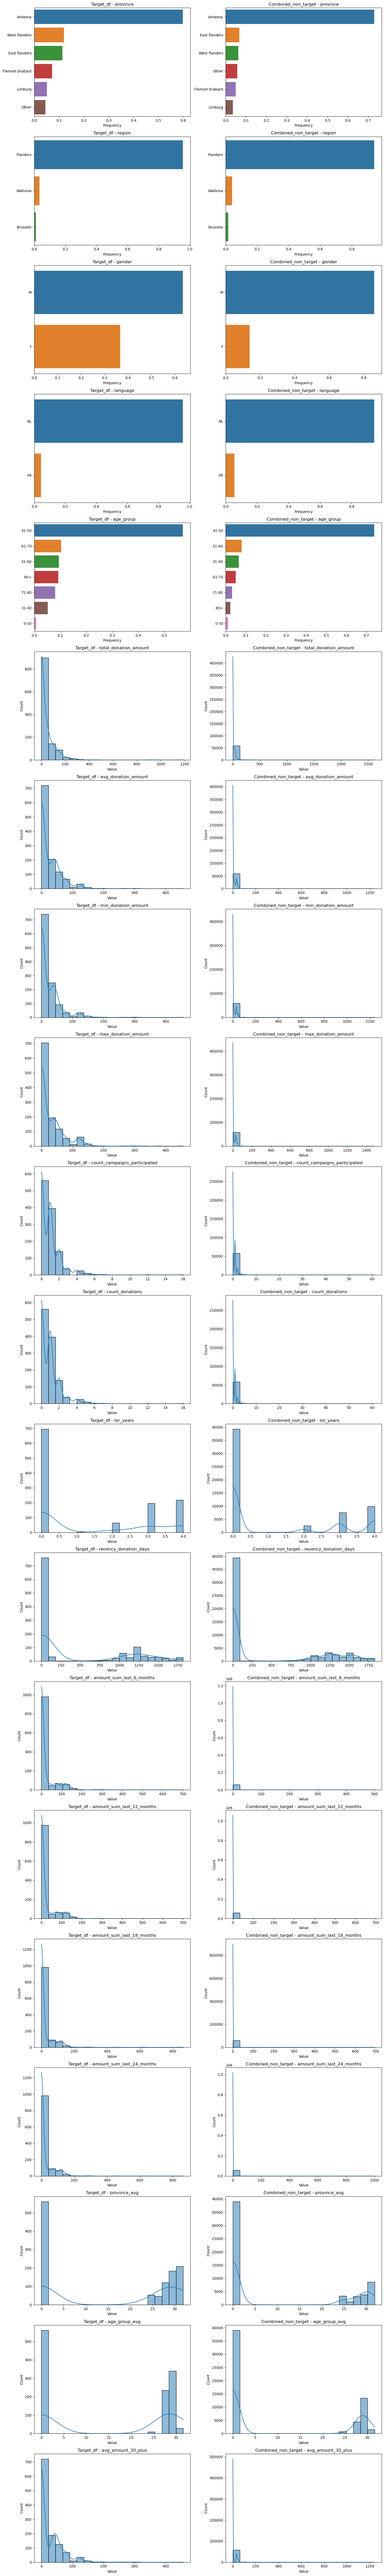

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of variables to plot
variables_to_plot = iv_cat_list + iv_num_list

# Set up subplots
fig, axes = plt.subplots(nrows=len(variables_to_plot), ncols=2, figsize=(15, 5 * len(variables_to_plot)))

# Iterate over variables and create plots
for i, variable in enumerate(variables_to_plot):
    # Plot for target_df (Categorical Variables)
    if variable in iv_cat_list:
        sns.barplot(y=target_df[variable].value_counts(normalize=True).index,
                    x=target_df[variable].value_counts(normalize=True).values,
                    ax=axes[i, 0], orient='h')
        axes[i, 0].set_title(f'Target_df - {variable}')
        axes[i, 0].set_xlabel('Frequency')
    
    # Plot for target_df (Numeric Variables)
    elif variable in iv_num_list:
        sns.histplot(target_df[variable], ax=axes[i, 0], bins=20, kde=True)
        axes[i, 0].set_title(f'Target_df - {variable}')
        axes[i, 0].set_xlabel('Value')

    # Plot for combined_non_target (Categorical Variables)
    if variable in iv_cat_list:
        sns.barplot(y=combined_non_target[variable].value_counts(normalize=True).index,
                    x=combined_non_target[variable].value_counts(normalize=True).values,
                    ax=axes[i, 1], orient='h')
        axes[i, 1].set_title(f'Combined_non_target - {variable}')
        axes[i, 1].set_xlabel('Frequency')

    # Plot for combined_non_target (Numeric Variables)
    elif variable in iv_num_list:
        sns.histplot(combined_non_target[variable], ax=axes[i, 1], bins=20, kde=True)
        axes[i, 1].set_title(f'Combined_non_target - {variable}')
        axes[i, 1].set_xlabel('Value')

# Adjust layout
plt.tight_layout()
plt.show()

In [117]:
'''
From this analysis, we can draw the following conclusions about our targeted donors:
The following categories can help build a more accurate segmentation. They are more frequent among donors 
than in the global population
- coming less from Antwerp than other people, but more from West Flanders and East Flanders
- Women are more likely to be donors 
- age category 61-70 is more likely to be donors
- all numeric features related to past donation are important. The more active, the most likely to donate
- Length of relationship is the exception, it is not a reliable feature for our project
'''

'\nFrom this analysis, we can draw the following conclusions about our targeted donors:\nThe following categories can help build a more accurate segmentation. They are more frequent among donors \nthan in the global population\n- coming less from Antwerp than other people, but more from West Flanders and East Flanders\n- Women are more likely to be donors \n- age category 61-70 is more likely to be donors\n- all numeric features related to past donation are important. The more active, the most likely to donate\n- Length of relationship is the exception, it is not a reliable feature for our project\n'

In [118]:
# Save to a pickle file using pandas
train1.to_pickle('train1.pkl')
test1.to_pickle('test1.pkl')
score1.to_pickle('score1.pkl')